# Environment setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Machine Learnia/Machine\ Learning/COVID-19\ Project
!ls

/content/drive/MyDrive/Colab Notebooks/Machine Learnia/Machine Learning/COVID-19 Project
dataset.xlsx  EDA_Exploratory_Data_Analysis.ipynb


In [3]:
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel('dataset.xlsx')

In [6]:
data.shape

(5644, 111)

In [7]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [8]:
data.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [9]:
data.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

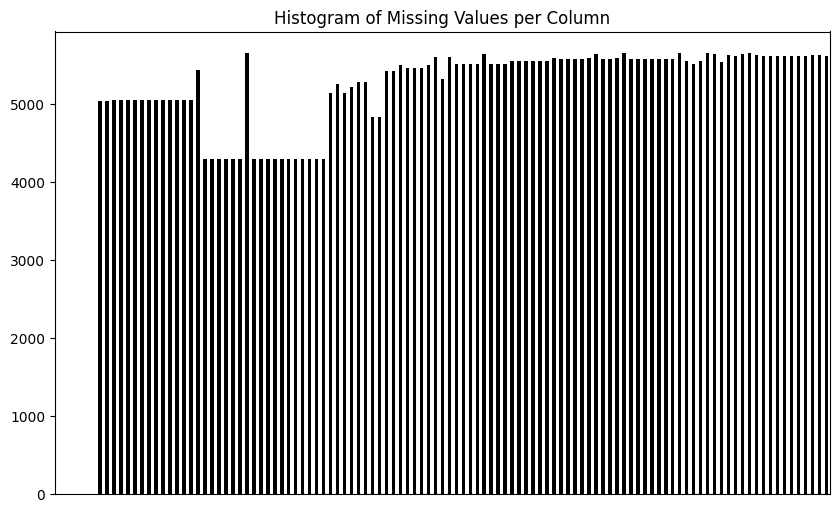

In [10]:
missing_count = data.isna().sum()

plt.figure(figsize=(10, 6))
missing_count.plot(kind='bar', color='black')
plt.title('Histogram of Missing Values per Column')
plt.xticks([], [])
plt.show()

# Form Analysis :
* target variable : SARS-Cov-2 exam result
* dataset size : (5644, 111)
* varibale types : quantitative 70, qualitative 41
* Missing values : An important amount of missing values, with 2 data groups :
  * 76% => Test viral
  * 89% => taux sanguins

# Deep Analysis
1. **Initial visualization** : elimination useless/irrelevant columns

In [11]:
df = data[data.columns[data.isna().sum()/data.shape[0] < 0.9]]

In [12]:
df.shape

(5644, 39)

In [13]:
df = df.drop('Patient ID', axis=1)

2. **Target visualization**

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64 



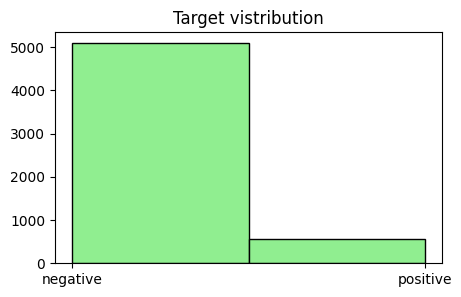

In [14]:
print(df['SARS-Cov-2 exam result'].value_counts(normalize=True), '\n')

# 2. Target visualization
plt.figure(figsize=(5, 3))
plt.hist(df['SARS-Cov-2 exam result'], bins=2, color='lightgreen', edgecolor='black')
plt.title('Target vistribution')
plt.show()

*   10% only negative cases


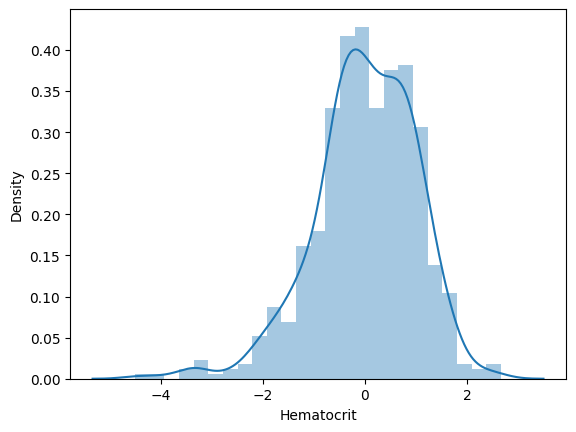

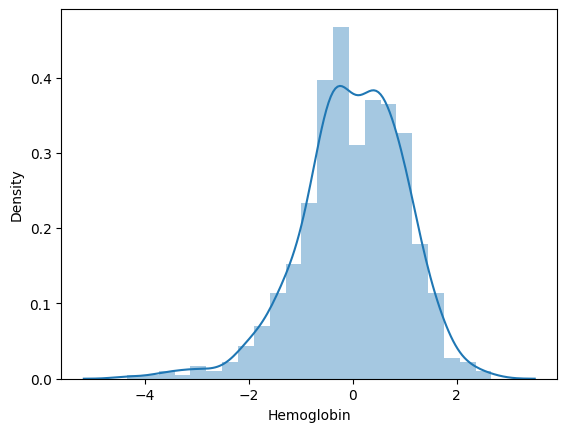

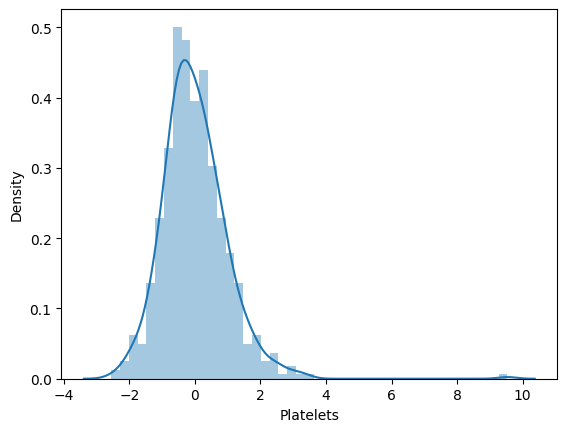

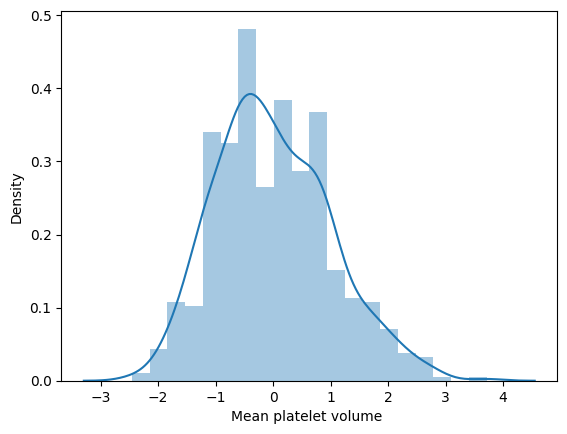

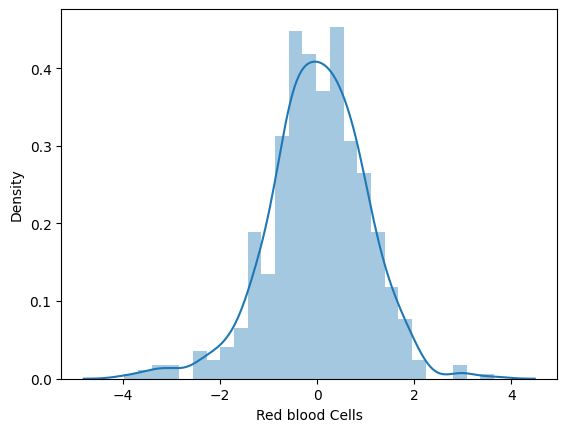

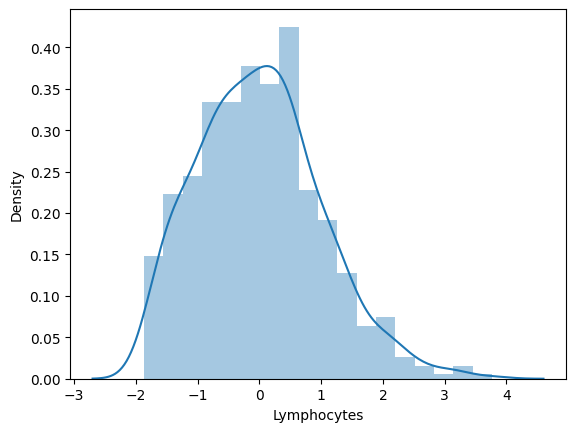

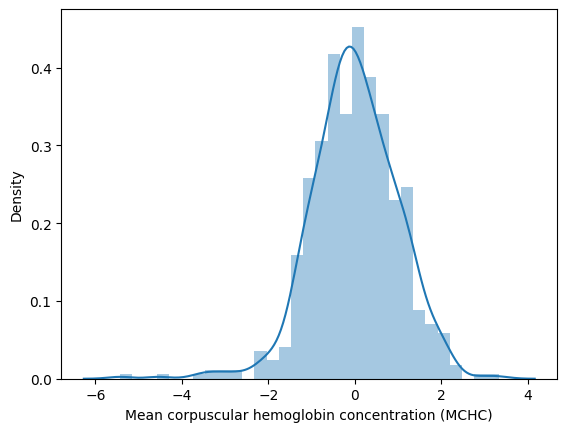

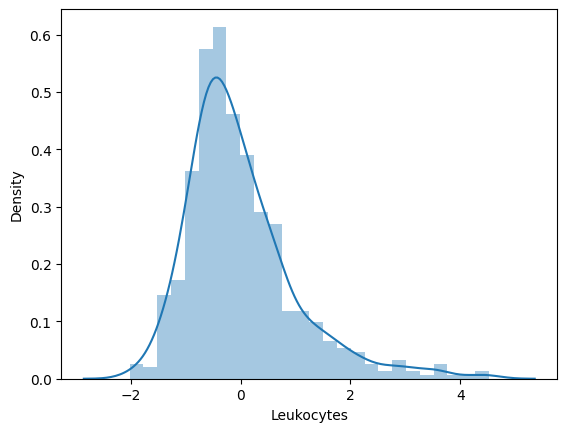

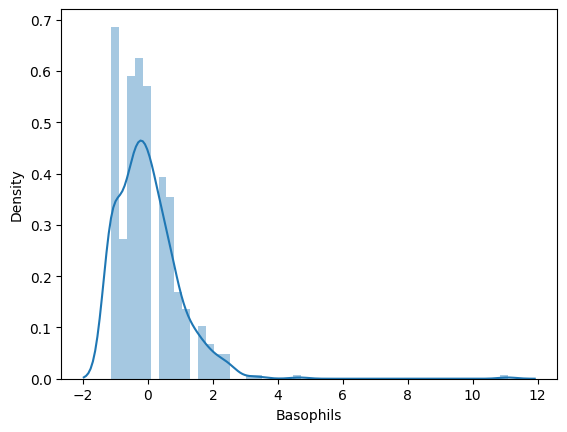

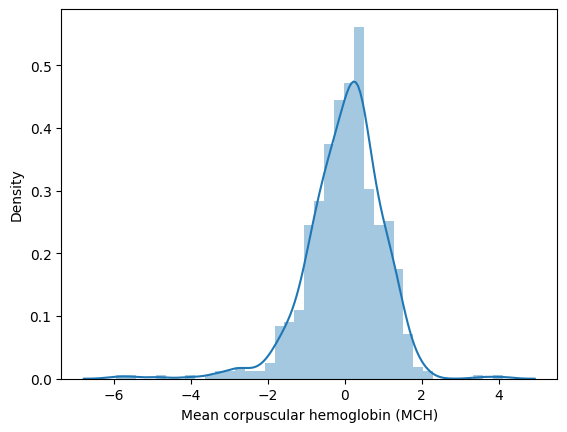

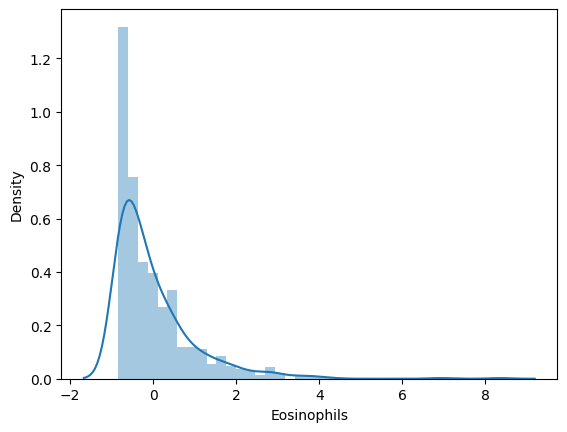

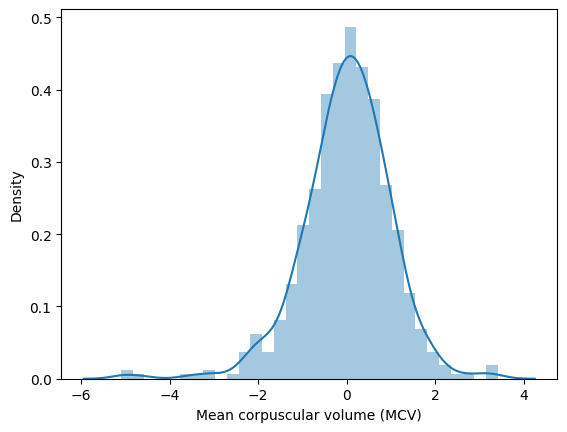

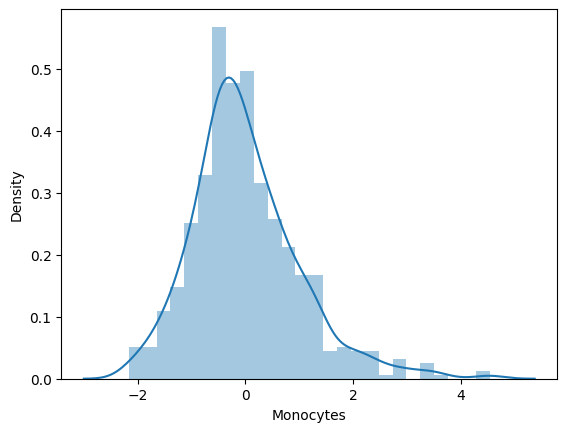

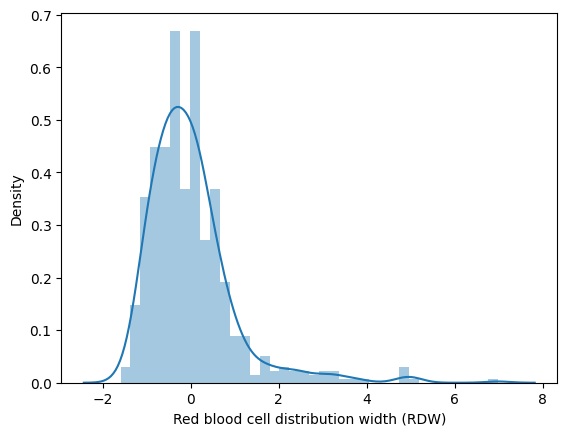

In [15]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[col])

<Axes: xlabel='Patient age quantile', ylabel='Density'>

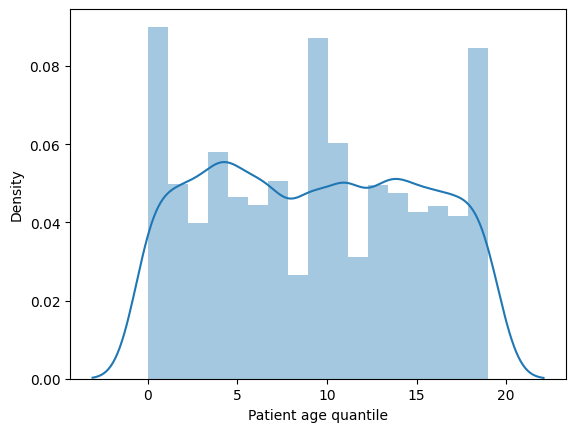

In [16]:
plt.figure()
sns.distplot(df['Patient age quantile'])

In [17]:
for col in df.select_dtypes('object'):
  print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

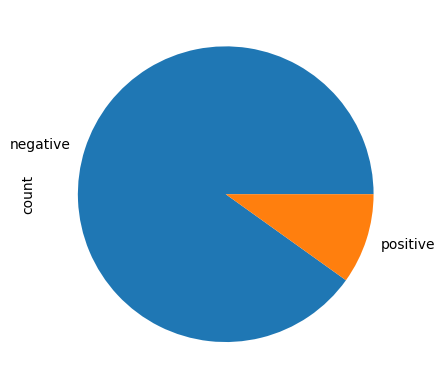

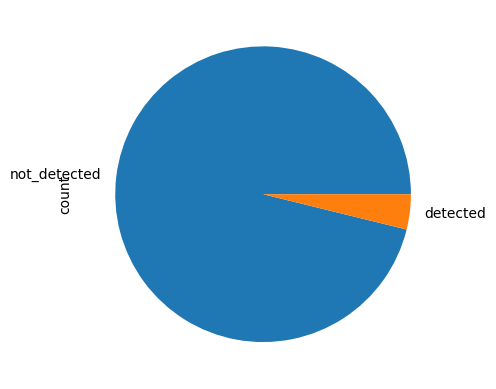

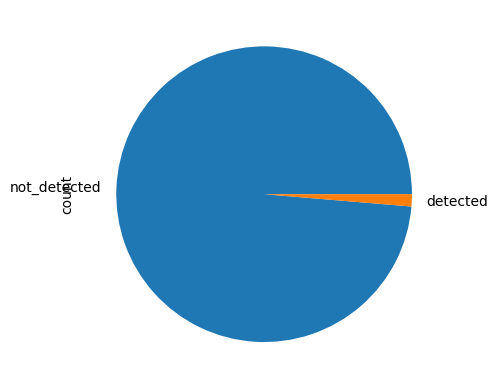

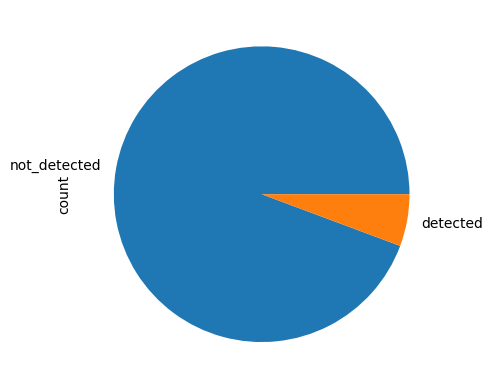

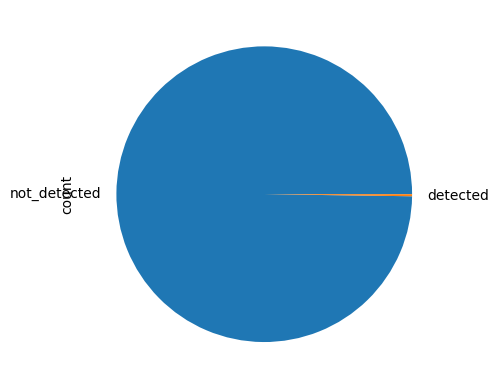

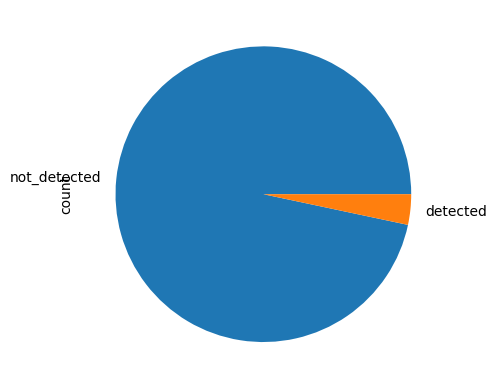

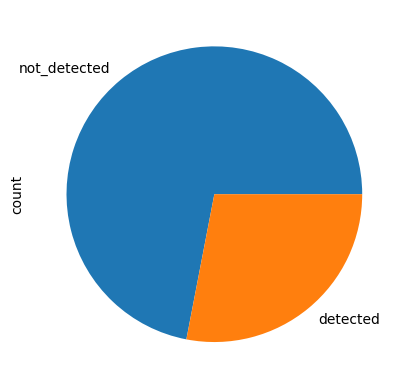

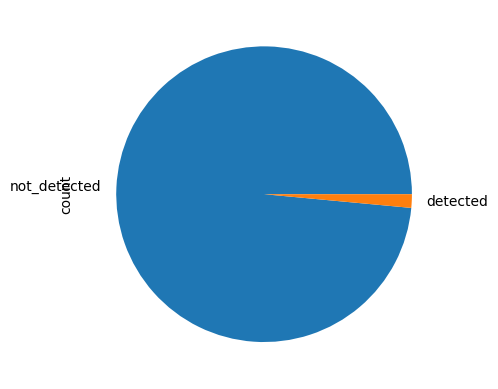

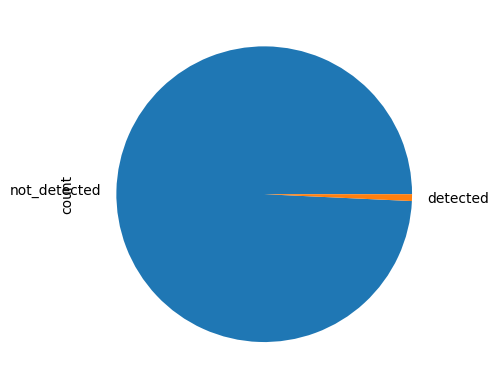

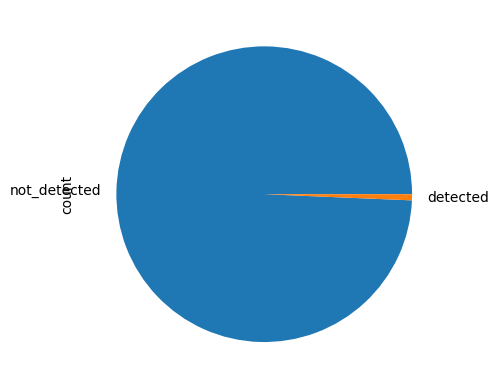

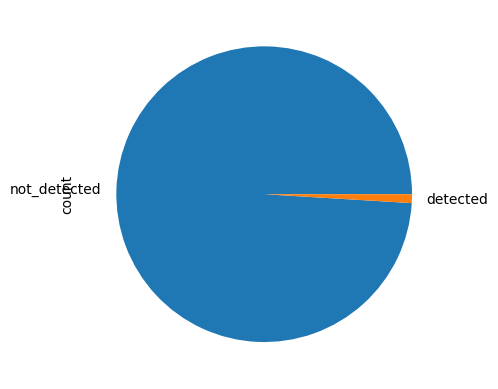

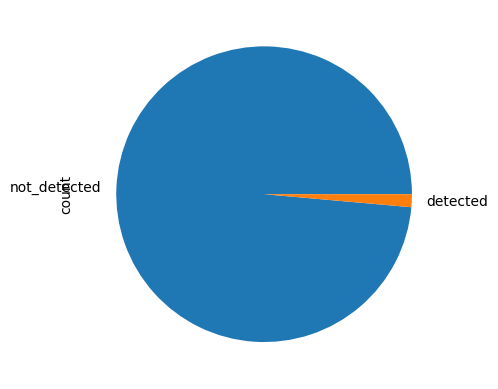

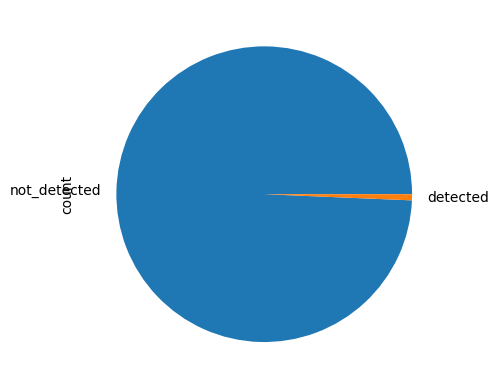

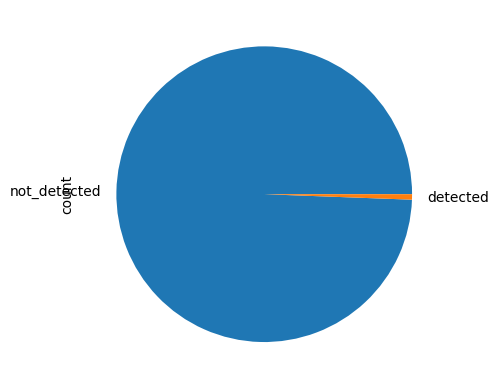

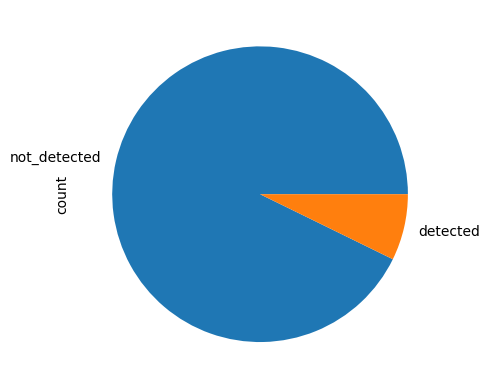

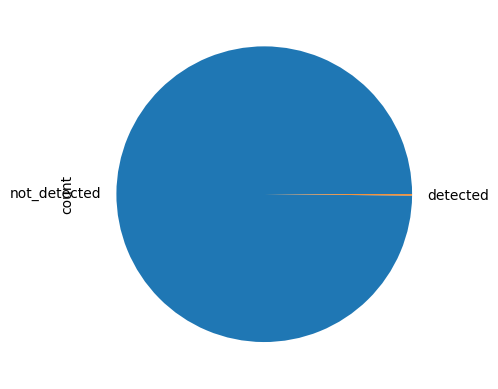

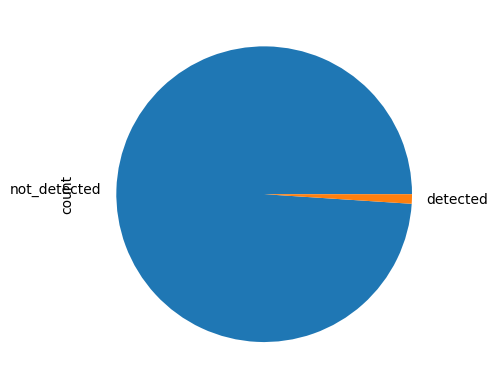

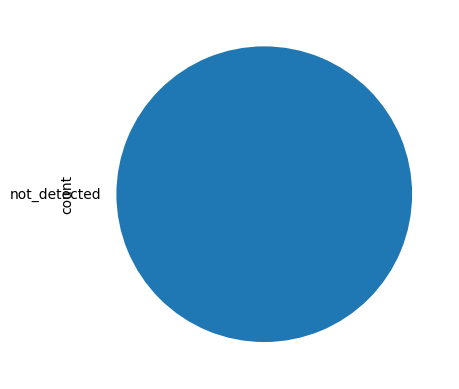

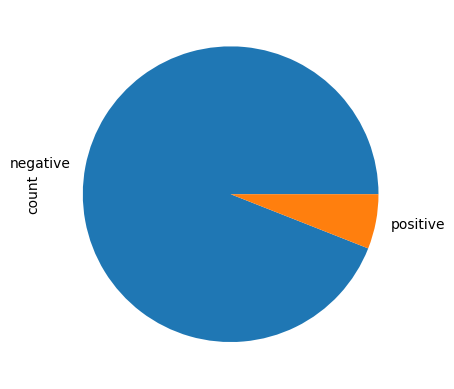

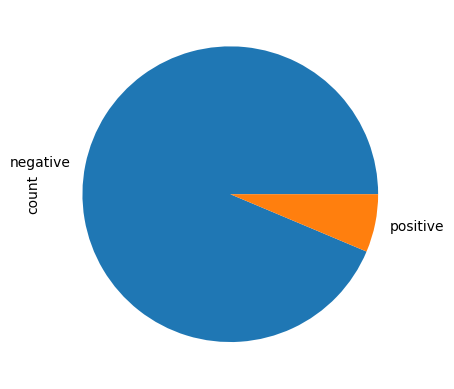

In [18]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()

3. **Variable signification** :
* standard continuous variables, skewed, test sanguin
* age quantile column was processed in some way
* Qualitative variables : binary (0, 1) viral, except for Rhinovirus which seems to be high

Positives/Negatives subsets creation :

In [19]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

Blood/Viral subsets creation :

In [20]:
missing_rate = df.isna().sum()/df.shape[0]

In [21]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [22]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

**Relation Target / Blood**

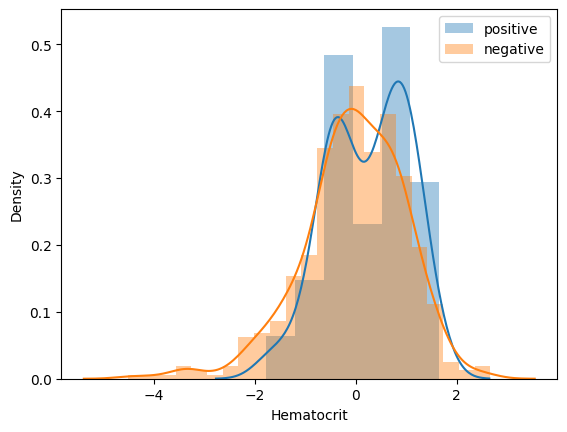

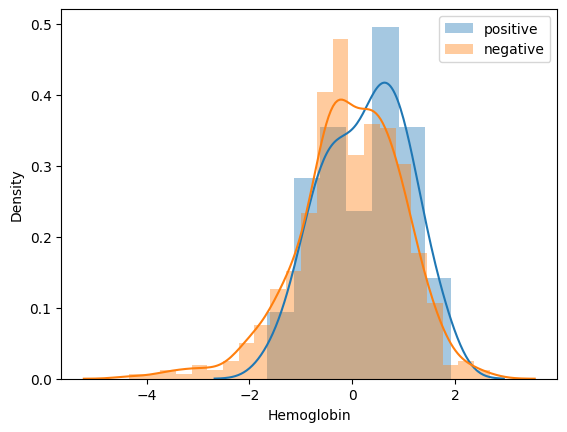

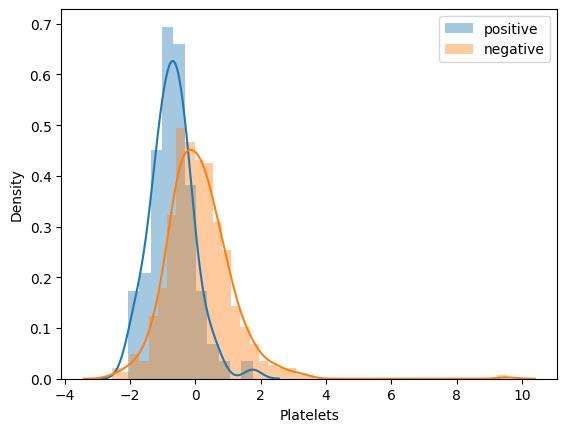

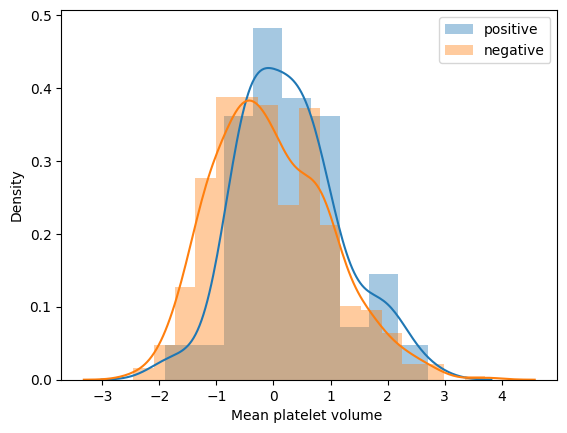

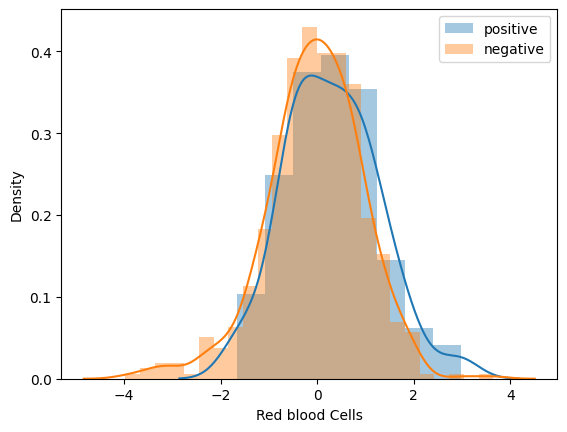

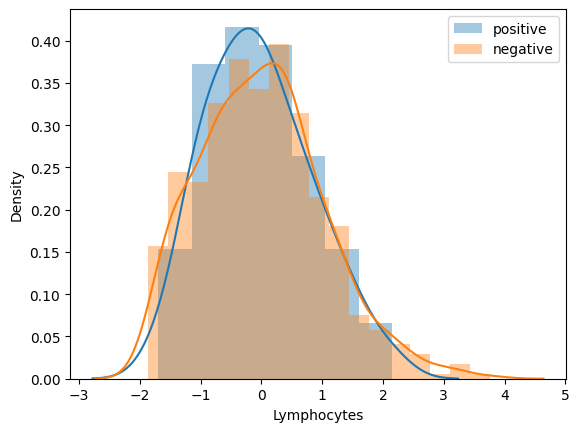

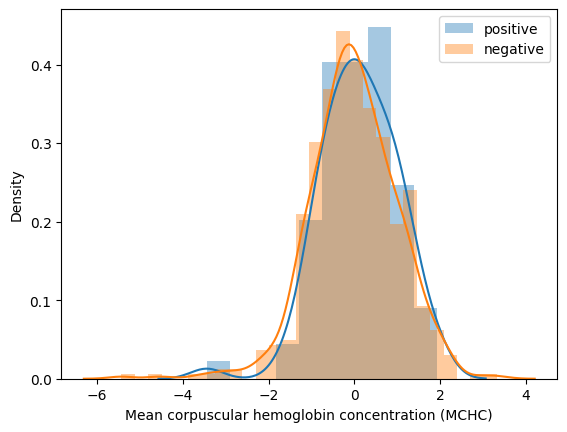

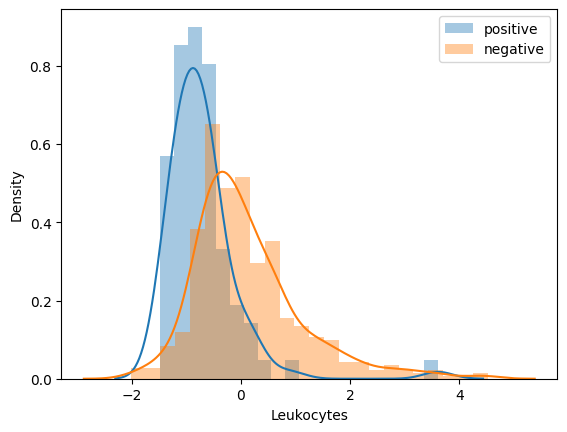

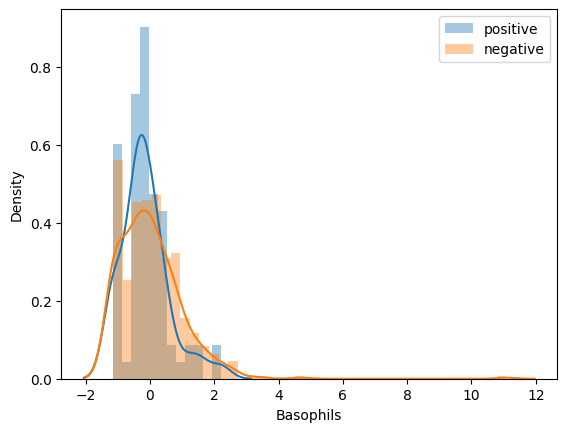

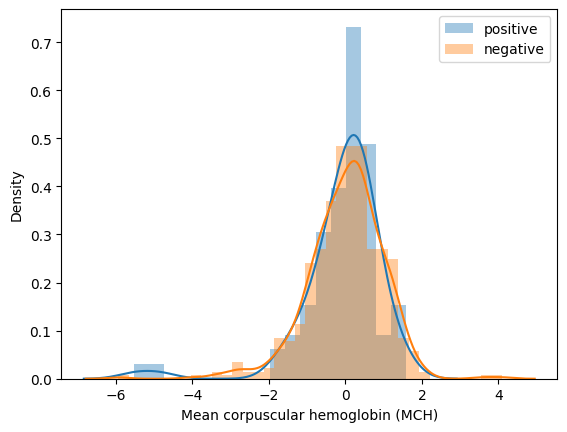

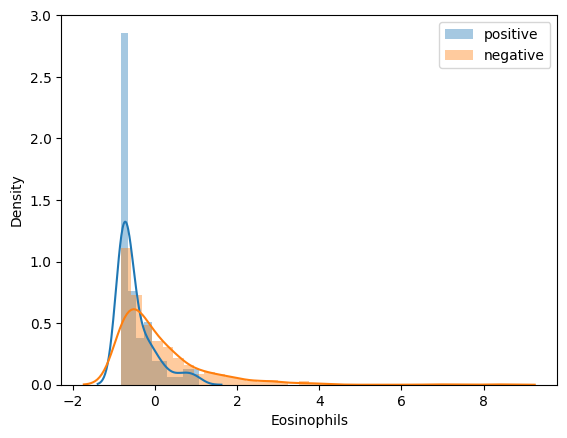

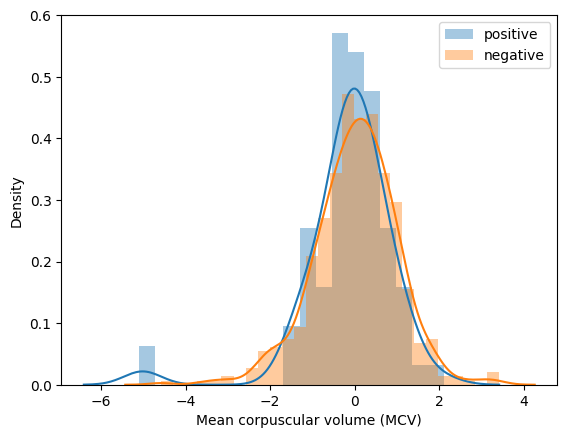

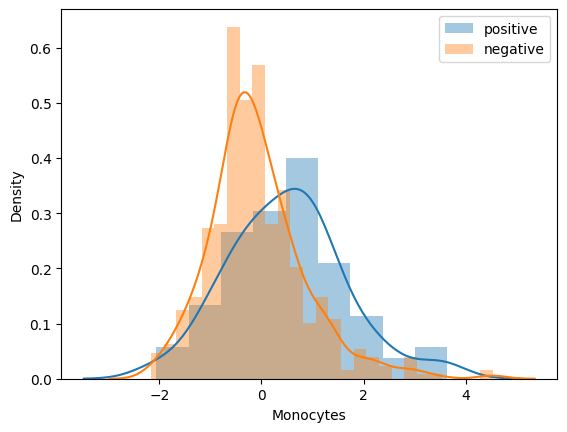

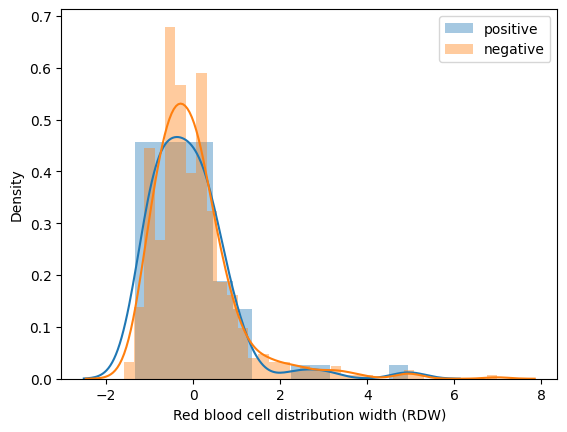

In [23]:
for col in blood_columns:
  plt.figure()
  sns.distplot(positive_df[col], label='positive')
  sns.distplot(negative_df[col], label='negative')
  plt.legend();

**Relation Target / Age**

<Axes: xlabel='Patient age quantile', ylabel='count'>

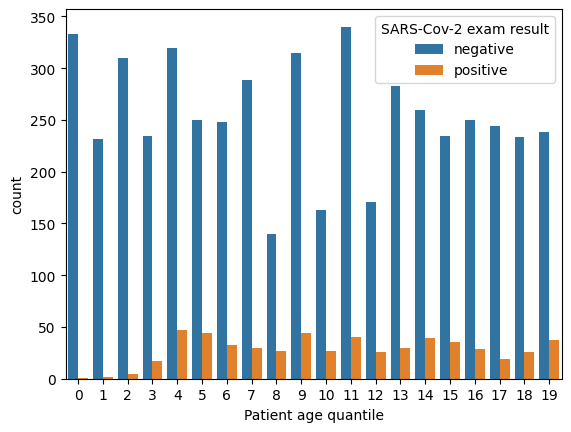

In [24]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

**Relation Target / Viral**

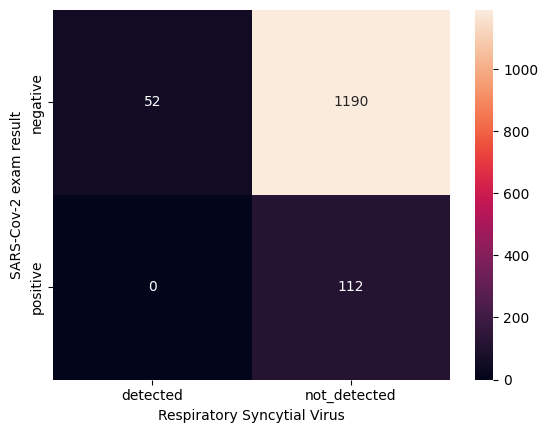

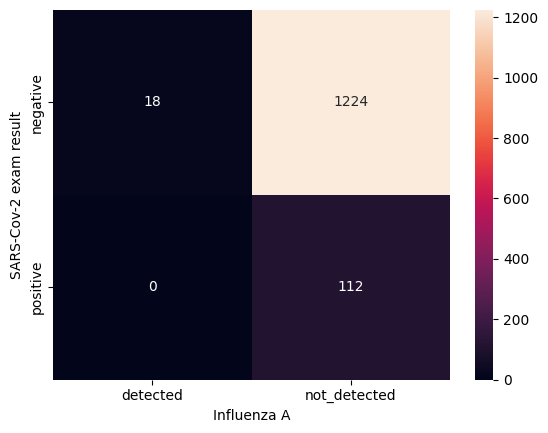

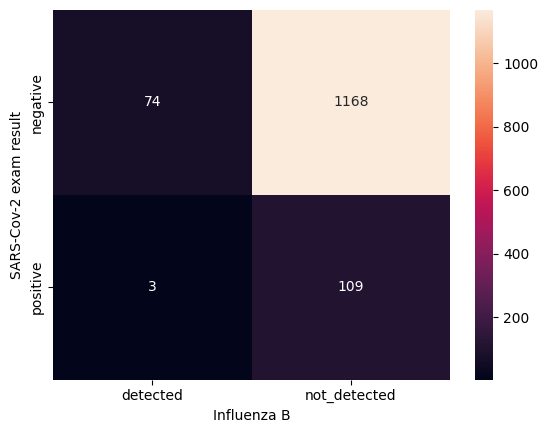

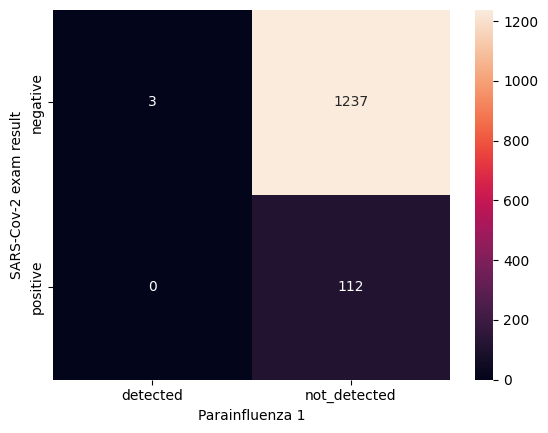

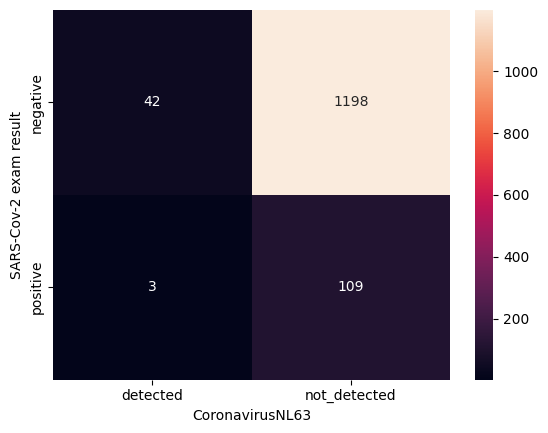

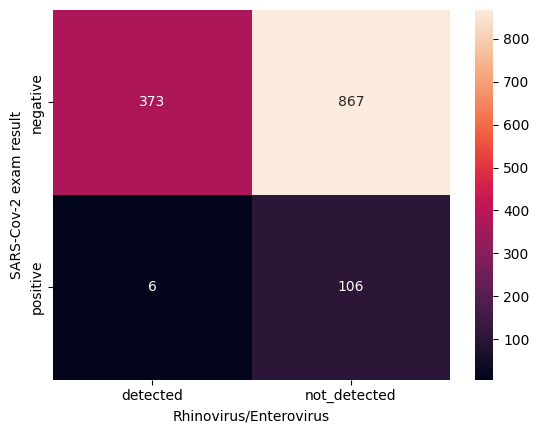

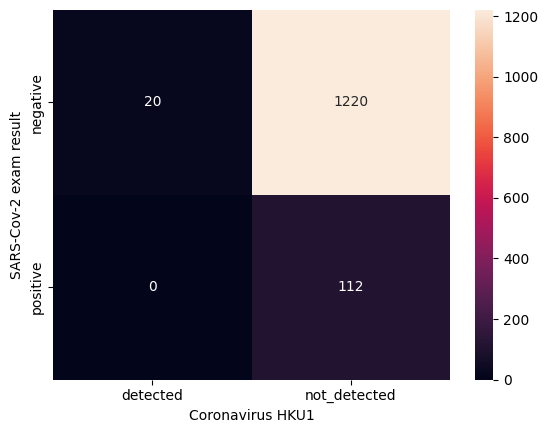

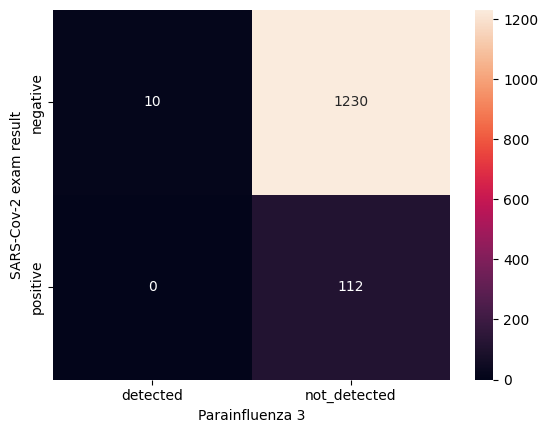

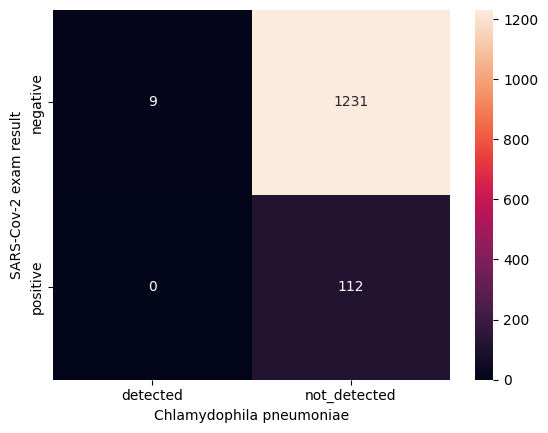

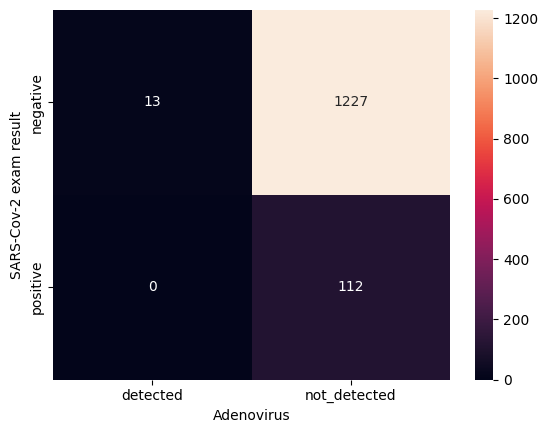

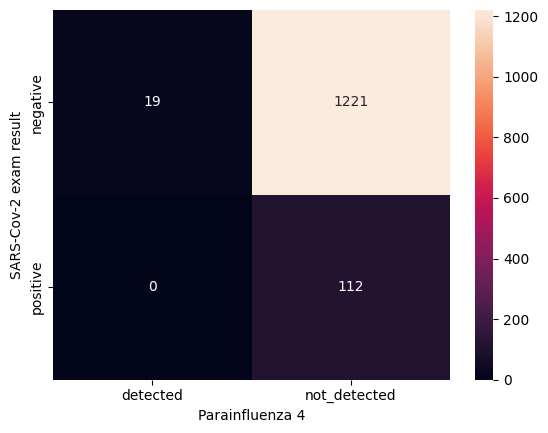

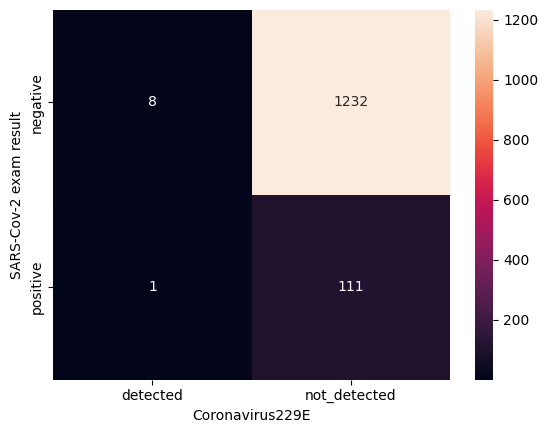

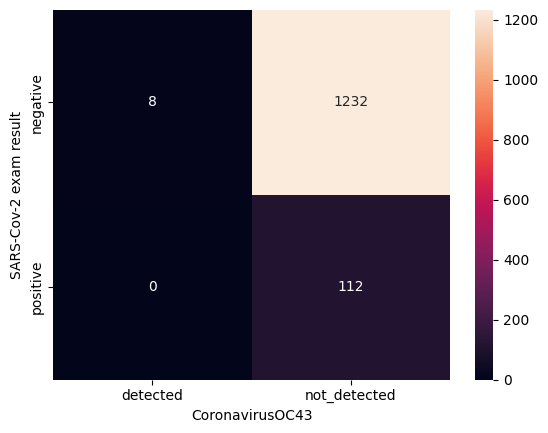

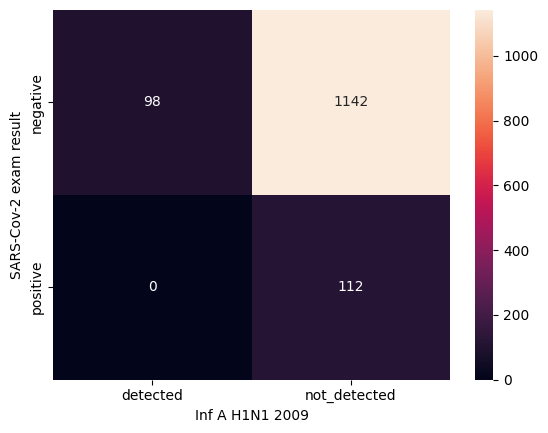

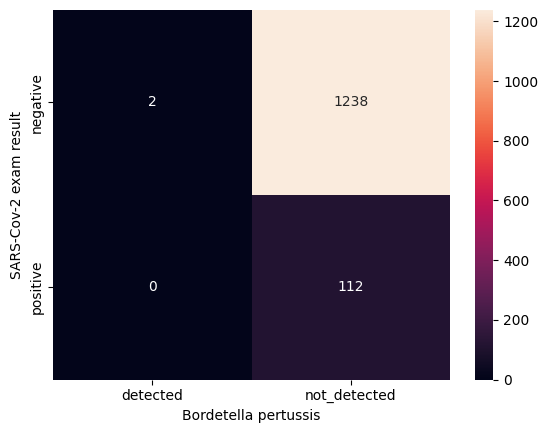

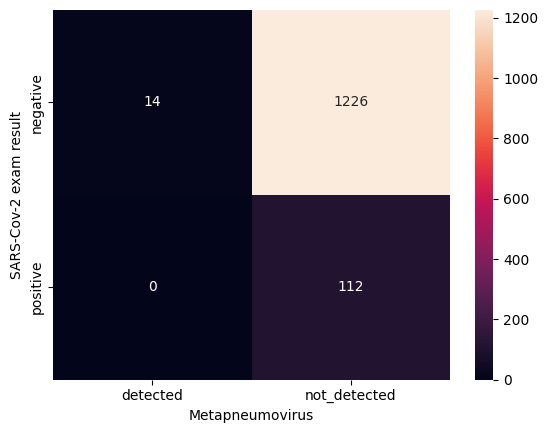

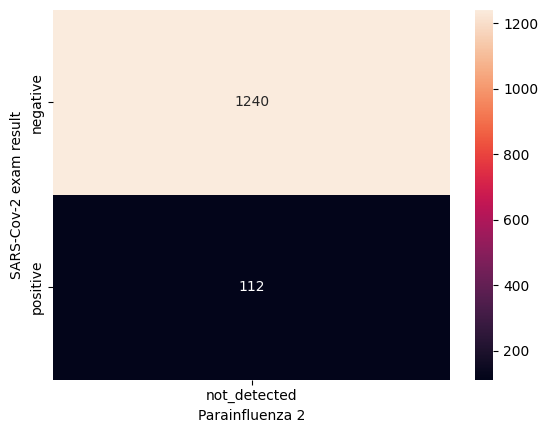

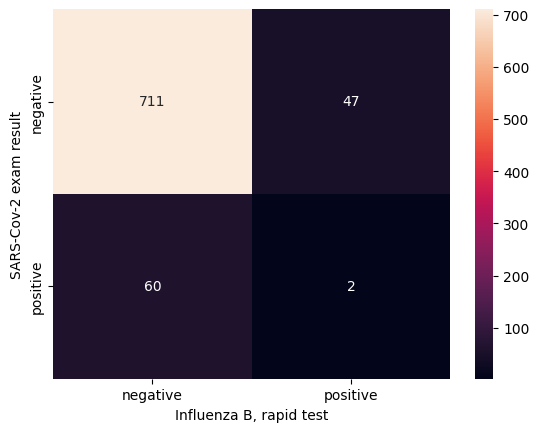

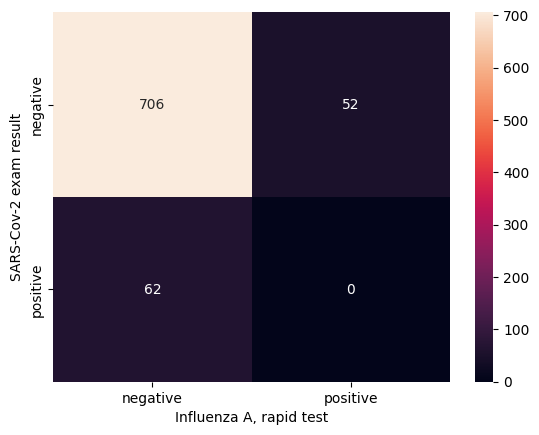

In [25]:
for col in viral_columns:
  plt.figure()
  sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

**Relation Target/Variables**

*   **Rel target/blood** : We notice that the amount of Monocytes, Platelets, Leukocytes may be related to covid-19 => Hypothesis to test
* **Rel target/age** : younger individuals are less contaminated (?) WARNING : WE CANNOT KNOW, but this variable still can be relevant
* **Rel target/viral** : doubles disease are rare, is there really a relation between Rhinovirus/Enterovirus and covid-19 (?) => Hypothesis to test



**Initial conclusions :**
- So many missing values, we keep 20% of the dataset at best
- 2 data groups blood/viral

# More Detailed Analysis

**Relation blood/blood :**

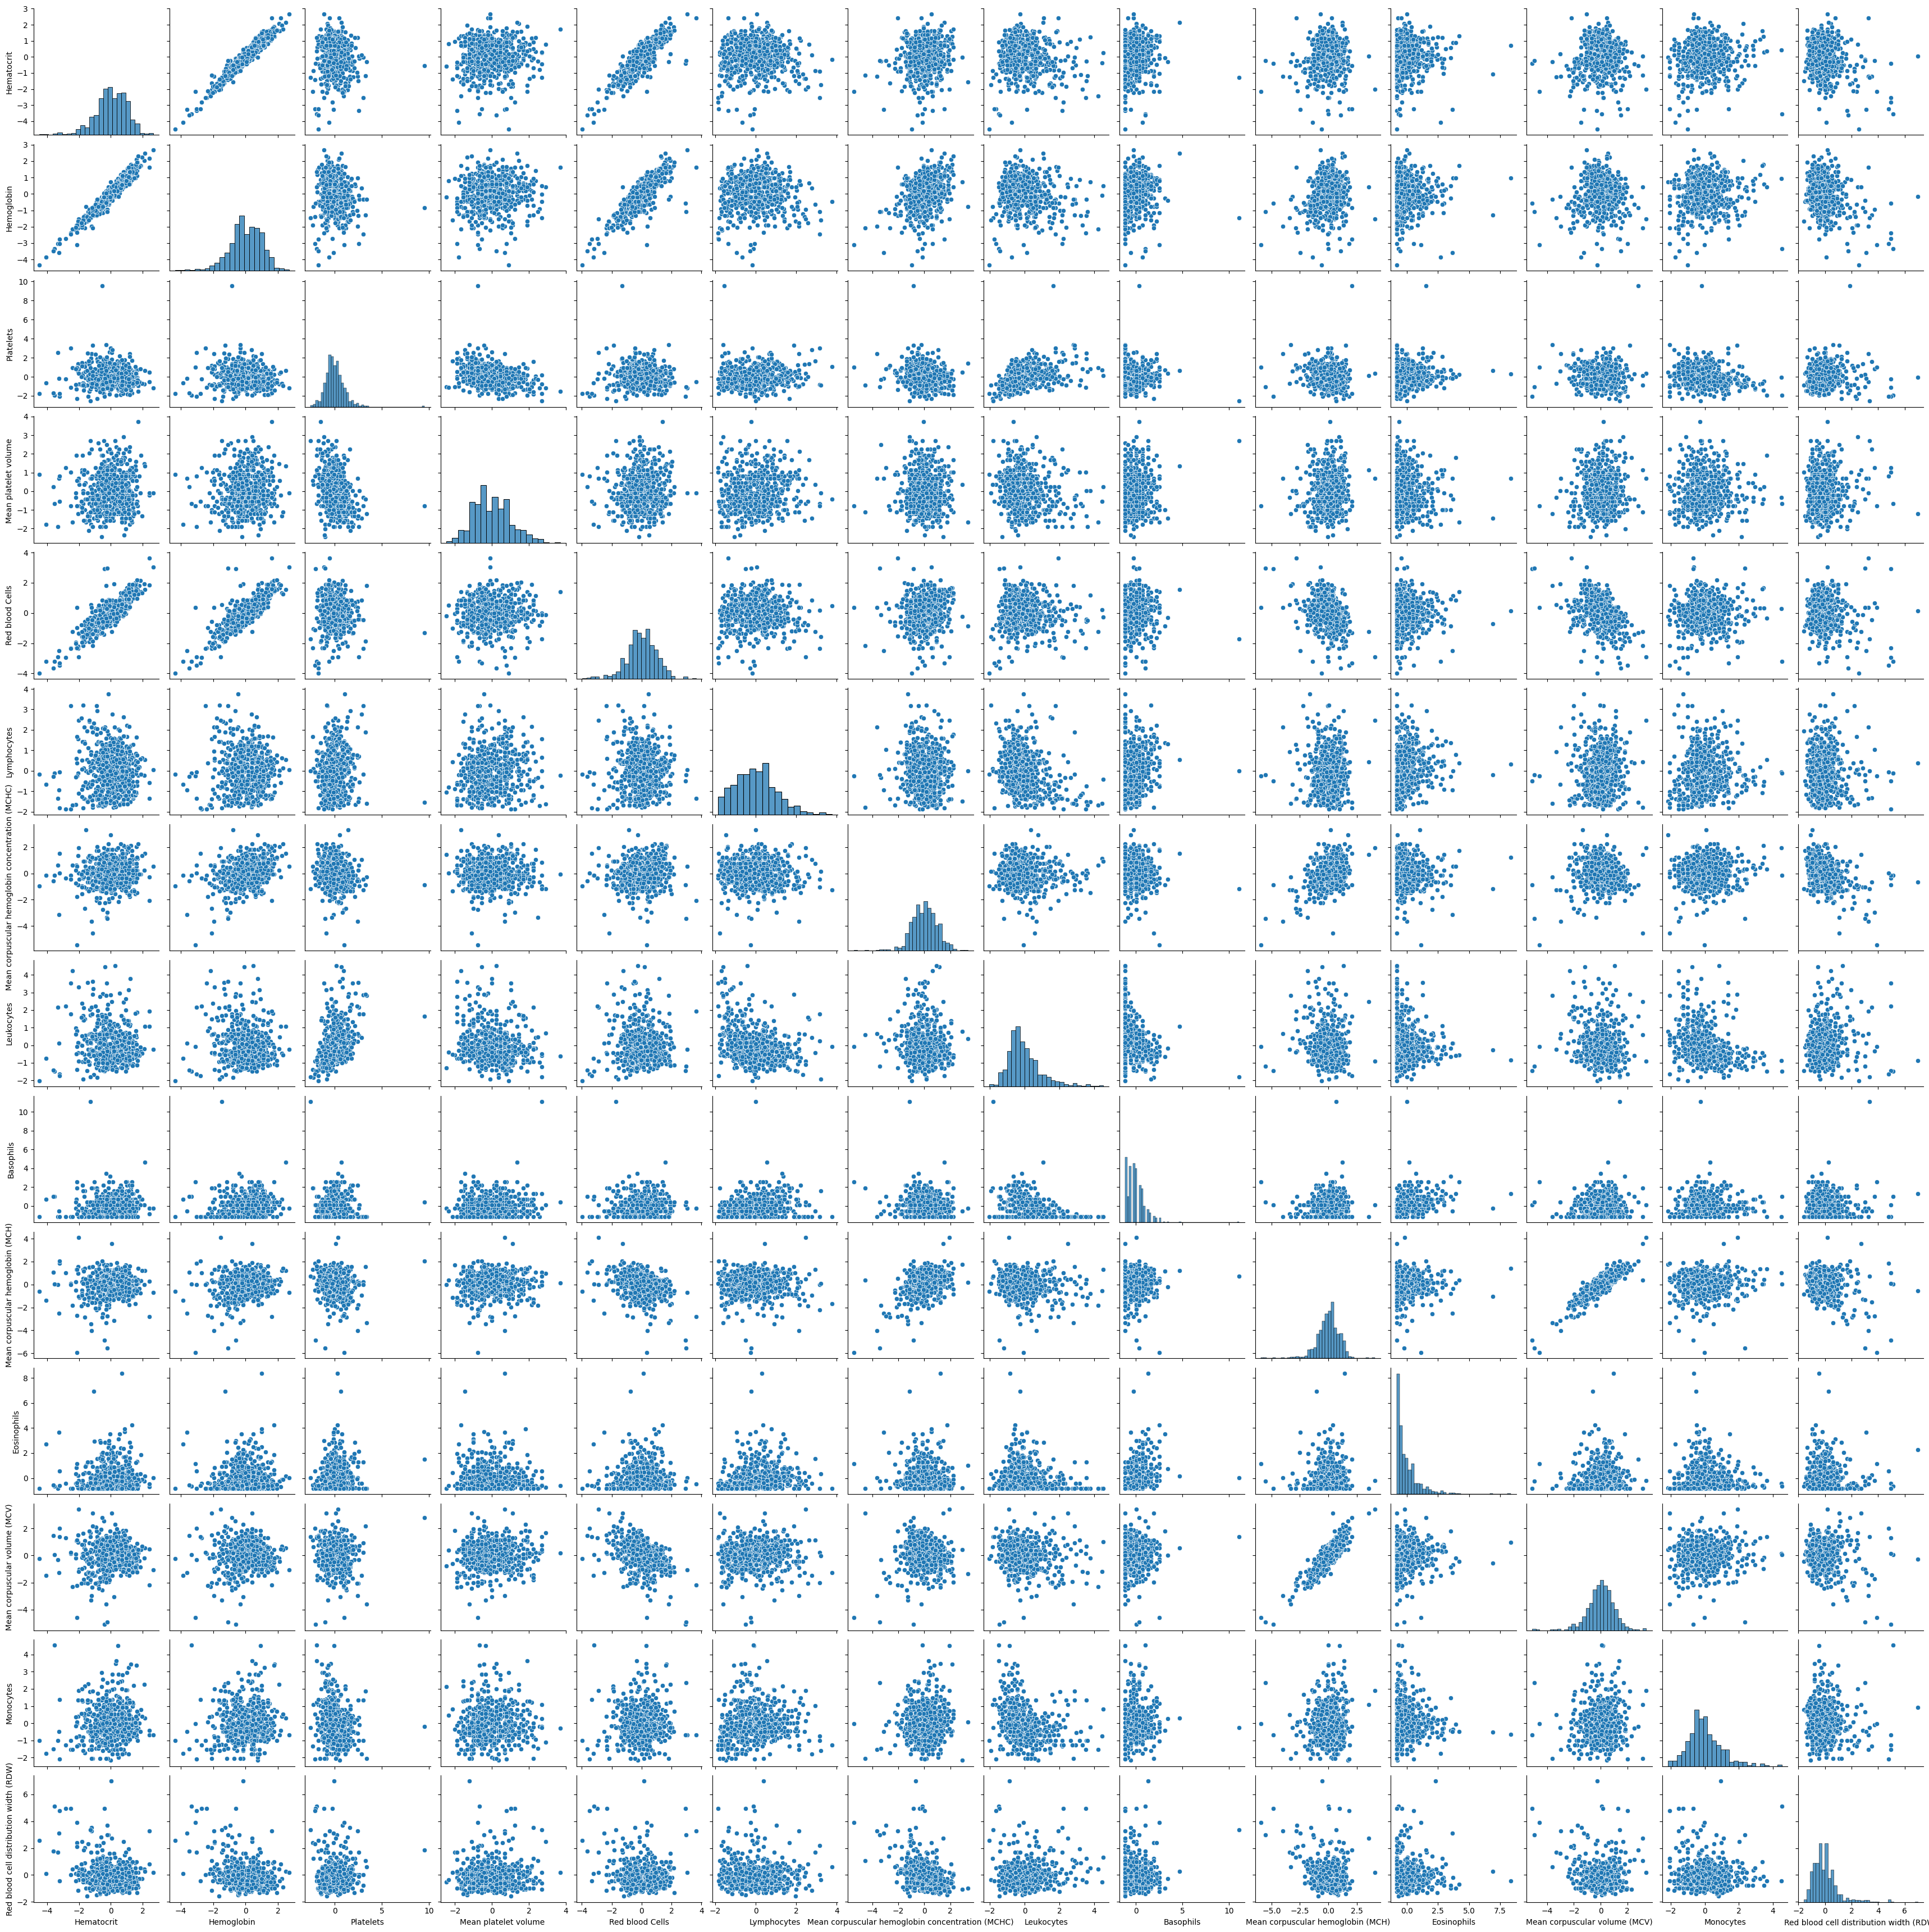

In [26]:
sns.pairplot(df[blood_columns])

<Axes: >

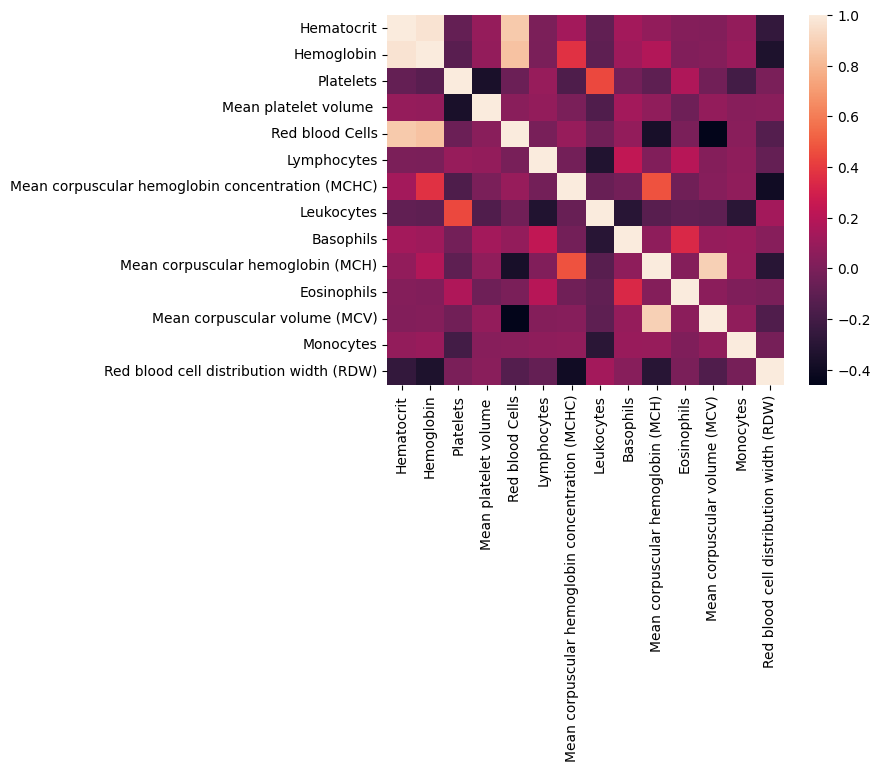

In [27]:
sns.heatmap(df[blood_columns].corr())

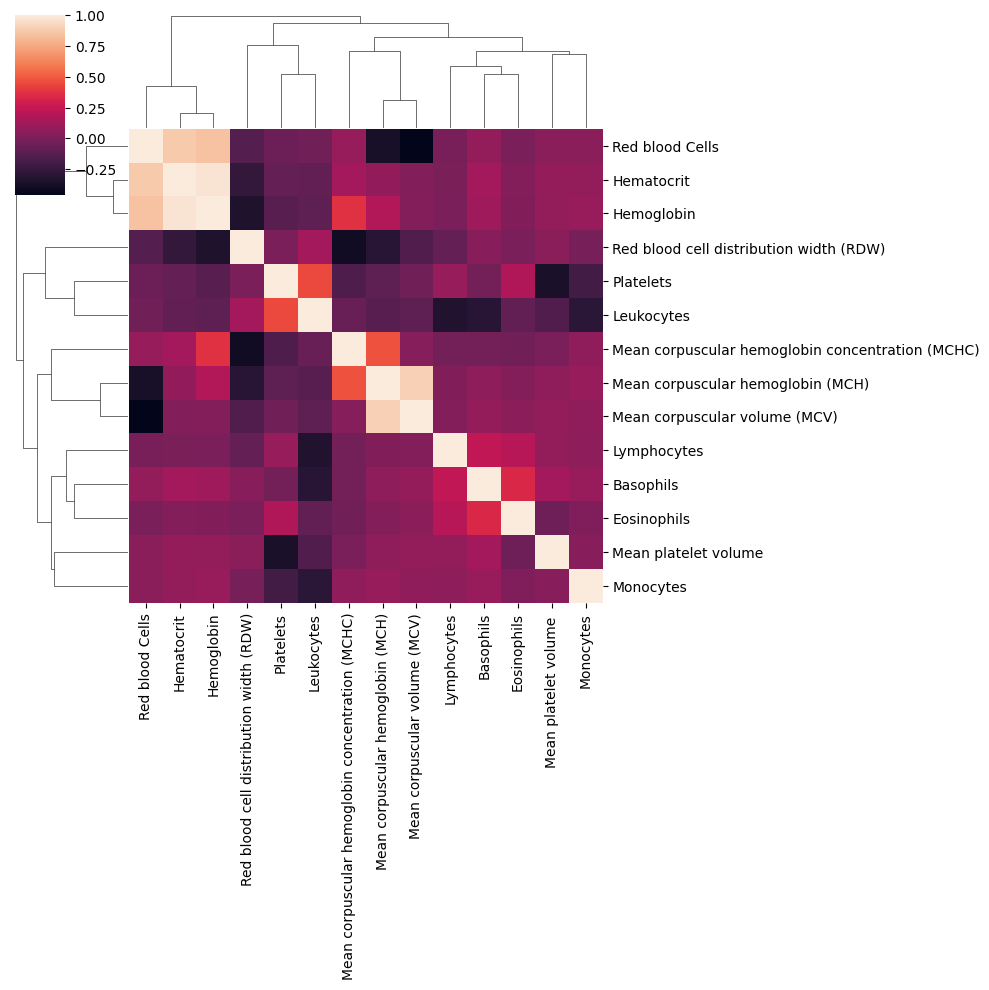

In [28]:
sns.clustermap(df[blood_columns].corr())

**Relation blood/age :**

<Figure size 640x480 with 0 Axes>

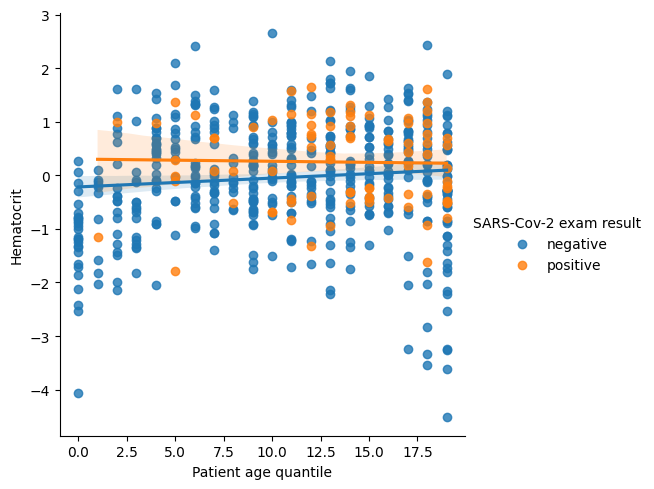

<Figure size 640x480 with 0 Axes>

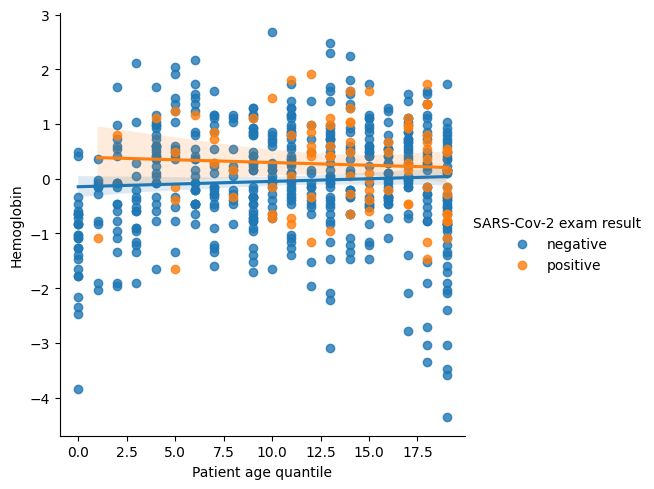

<Figure size 640x480 with 0 Axes>

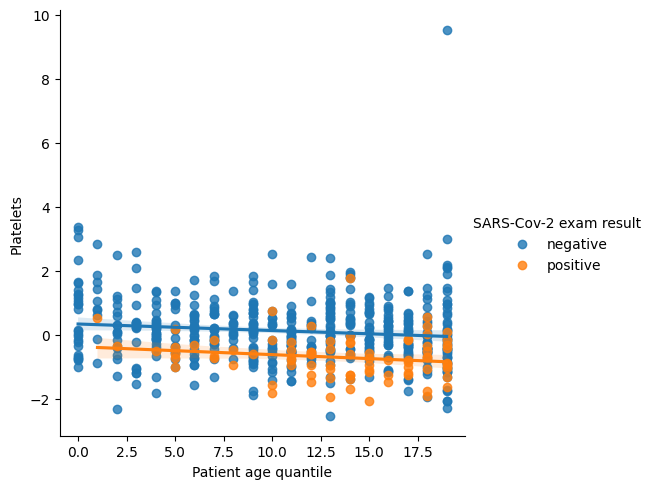

<Figure size 640x480 with 0 Axes>

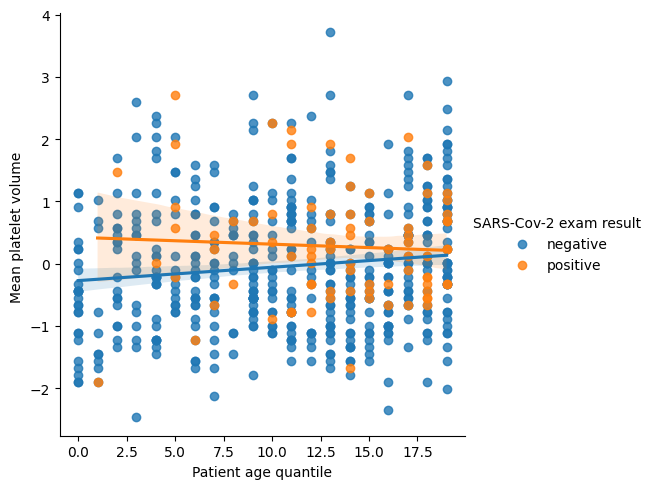

<Figure size 640x480 with 0 Axes>

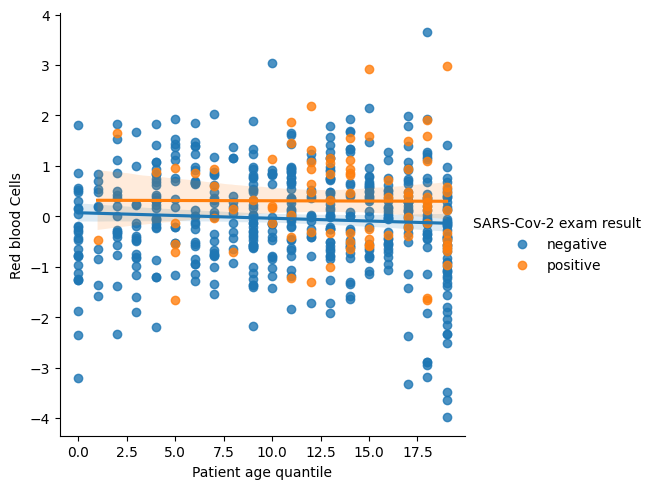

<Figure size 640x480 with 0 Axes>

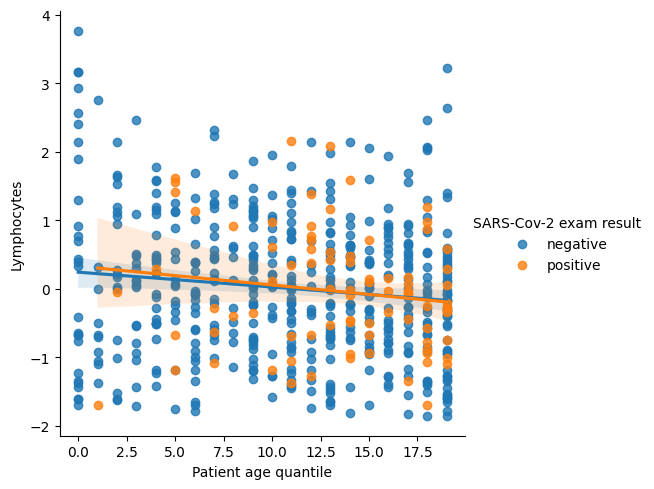

<Figure size 640x480 with 0 Axes>

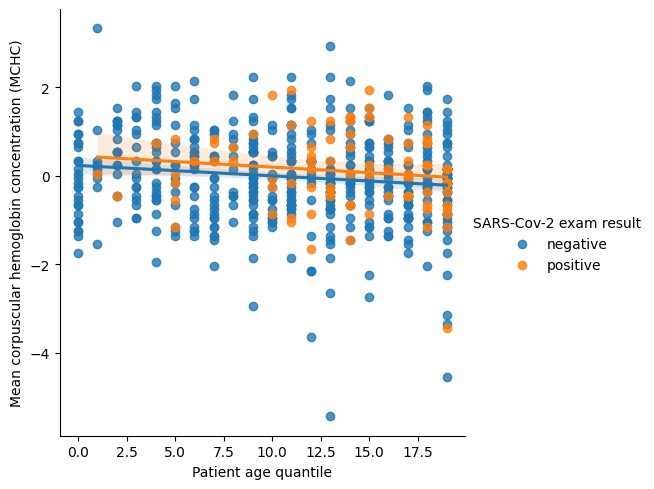

<Figure size 640x480 with 0 Axes>

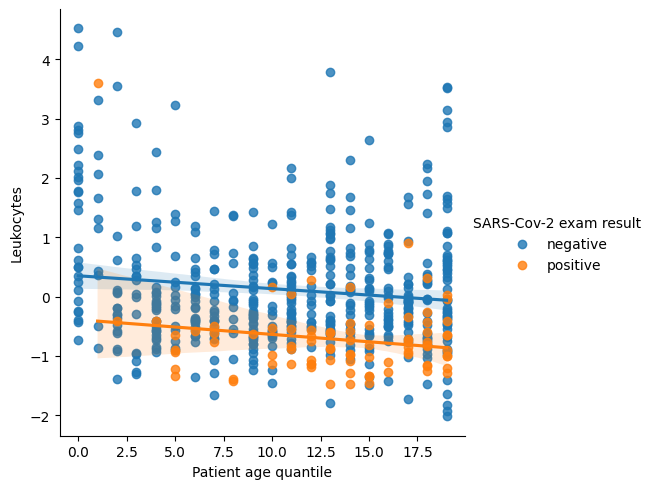

<Figure size 640x480 with 0 Axes>

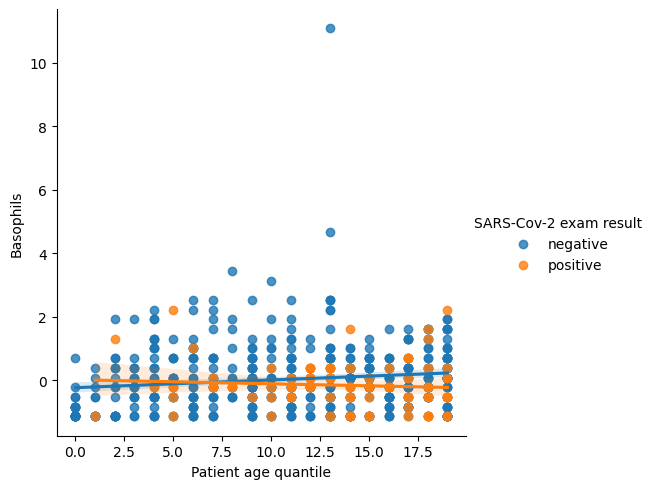

<Figure size 640x480 with 0 Axes>

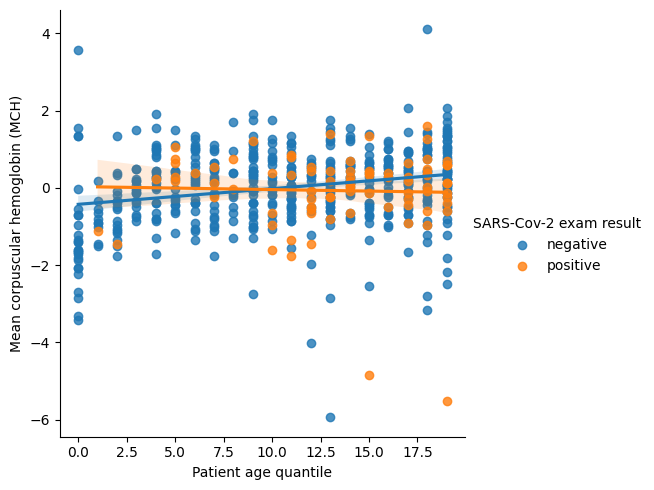

<Figure size 640x480 with 0 Axes>

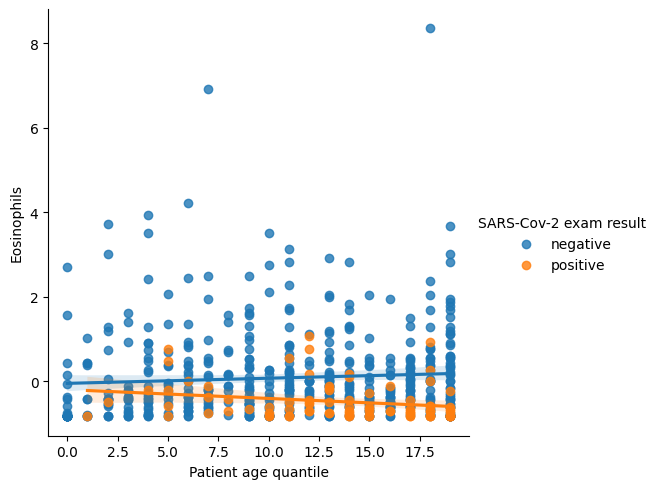

<Figure size 640x480 with 0 Axes>

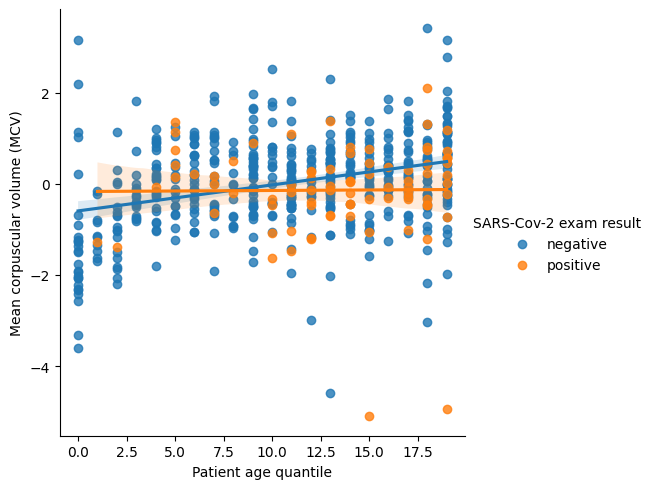

<Figure size 640x480 with 0 Axes>

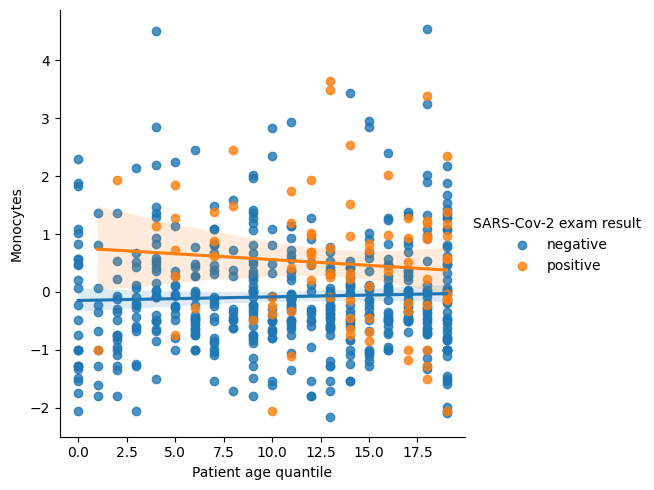

<Figure size 640x480 with 0 Axes>

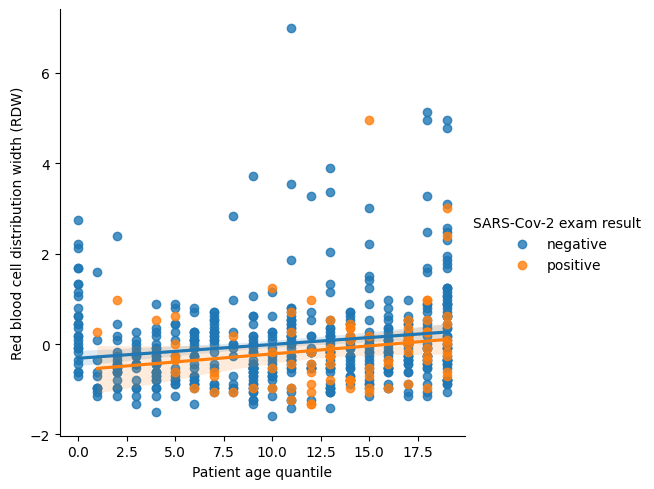

In [29]:
for col in blood_columns:
  plt.figure()
  sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [30]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [31]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

**Relation Variables/Variables :**

- blood_data / blood_data : some variables are highly correlated +0.9 (keep an eye on that for later)
- blood_data / age : very poor correlation between age and blood rate
- viral / viral : influenza rapid test has poor results, we might wanna let it go
- relation disease / blood_data : blood rates are different between covid and other disease
- relation hospitalization / has disease
- relation hospitalization / blood : data can be useful in case we are interested to know which service the patient should go to

**NaN analysis :**
- Viral : 1350 (92/8)
- Blood : 600 (87/13)
- Both : 90

**Null hypothesis H0 :**
- Individuals with positive covid results have significantly different Leukocytes, Platelets, Monocytes rates :
    - H0 : average rates are EQUAL between positive/negative partients => Rejected
- Individuals with other diseases have significantly different rates

**Relation Viral/Blood :**

Create a new variable 'Has disease'

In [32]:
df['has_disease'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

In [33]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test has_disease  
0                      NaN                      NaN       False  
1                 negative                 negative        True  
2                      NaN                      NaN       False  
3                      NaN                      NaN       False  
4                      NaN                      NaN        True  

[5 rows x 39 columns]

In [34]:
has_disease_df = df[df['has_disease'] == True]
no_disease_df = df[df['has_disease'] == False]

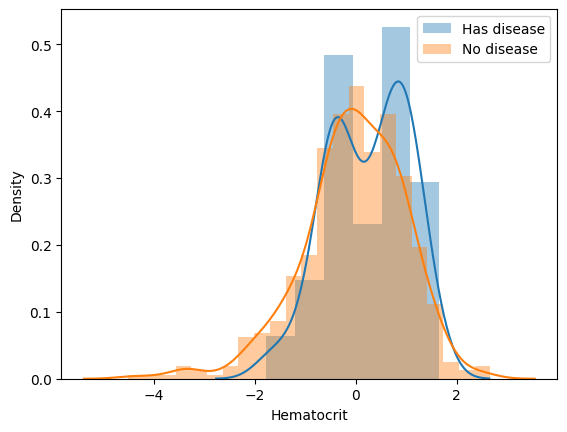

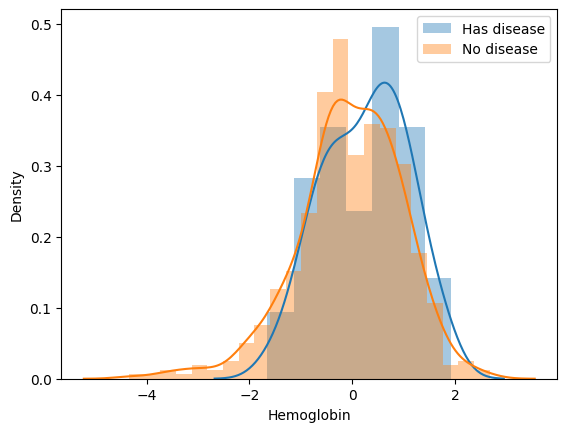

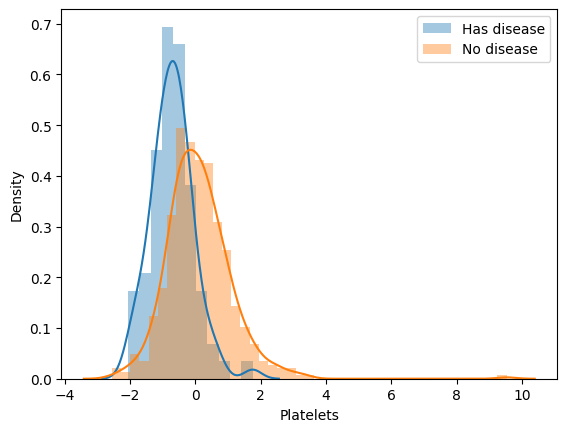

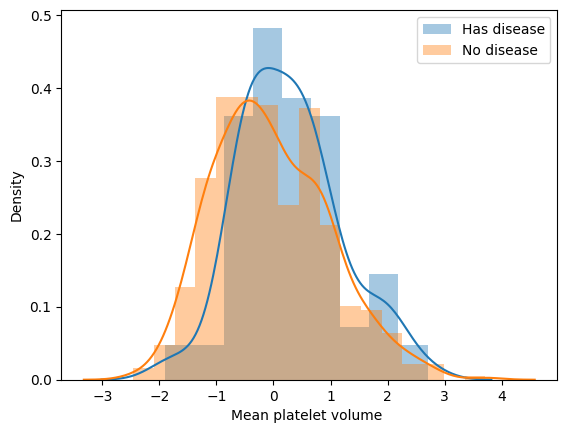

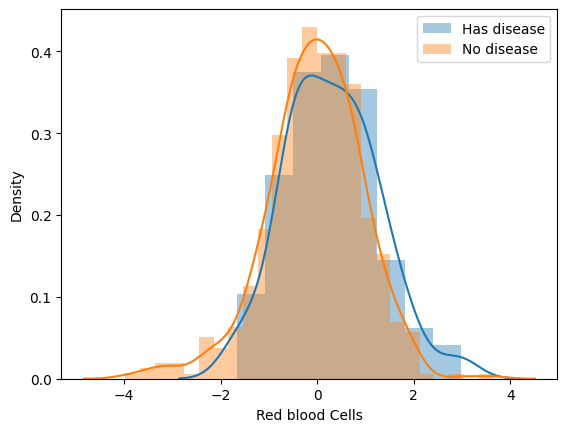

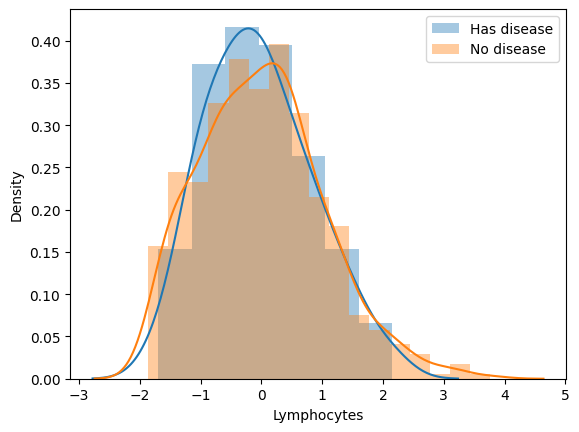

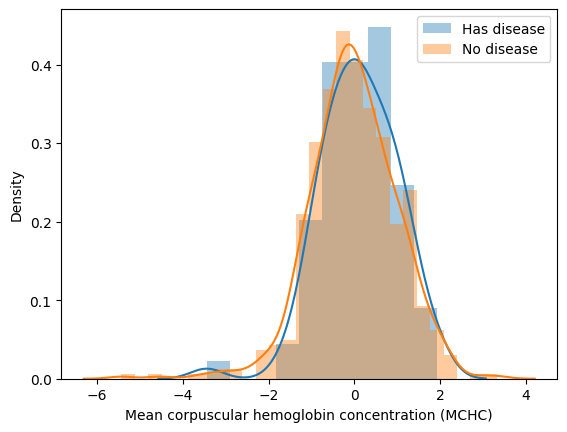

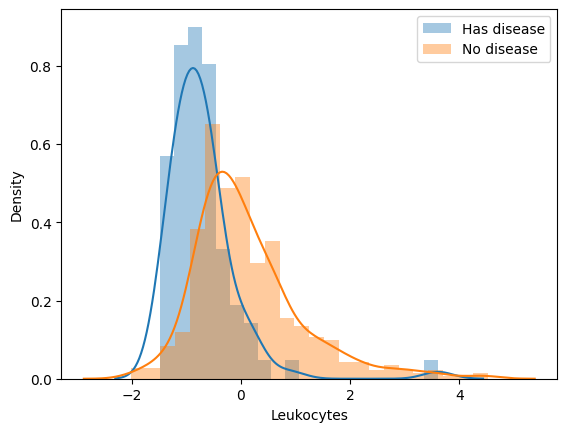

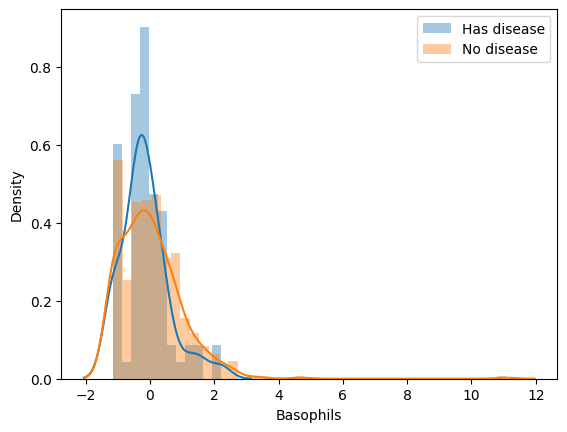

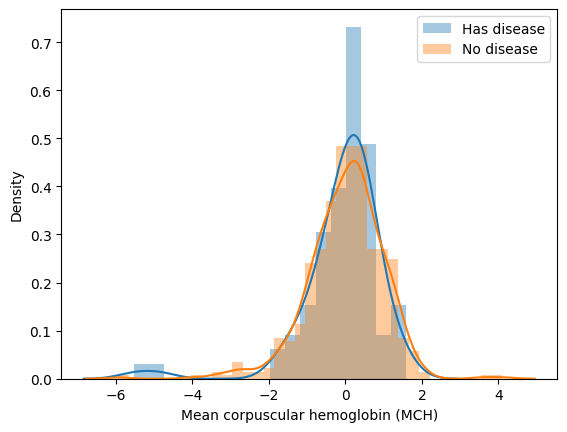

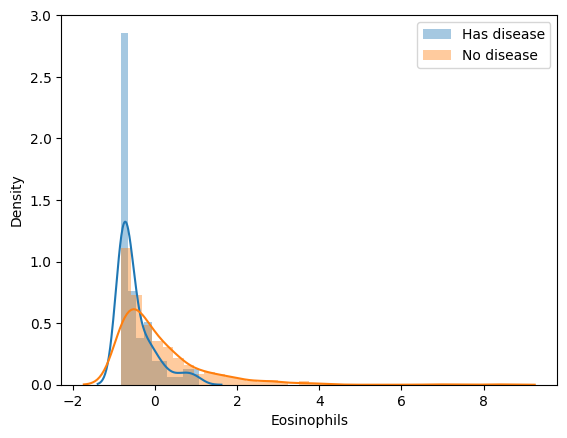

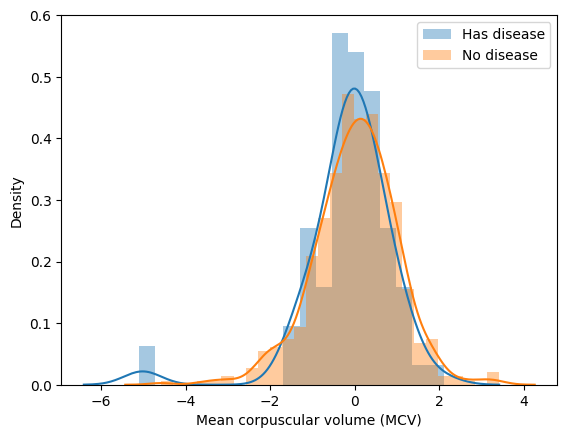

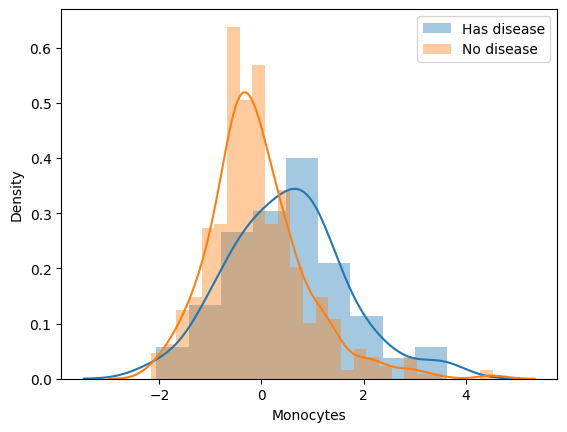

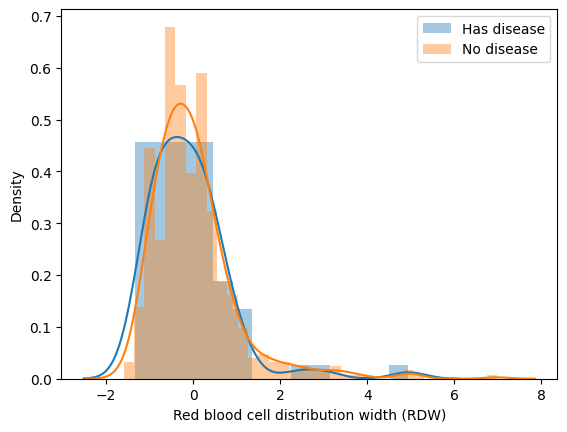

In [35]:
for col in blood_columns:
  plt.figure()
  sns.distplot(positive_df[col], label='Has disease')
  sns.distplot(negative_df[col], label='No disease')
  plt.legend();

**Relation hospitalization / has disease**

In [36]:
def hospitalization(df):
  if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
    return 'surveillance'
  elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']:
    return 'semi-intensive care'
  elif df['Patient addmited to intensive care unit (1=yes, 0=no)']:
    return 'intensive care'
  else:
    return 'inconnu'

In [37]:
df['status'] = df.apply(hospitalization, axis=1)

In [38]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0              NaN              NaN              NaN                   NaN   
1     not_detected     not_detected     not_detected          not_detected   
2              NaN              NaN              NaN                   NaN   
3              NaN              NaN              NaN                   NaN   
4     not_detected     not_detected     not_detected          not_detected   

   Metapneumovirus  Parainfluenza 2  Influenza B, rapid test  \
0              NaN              NaN                      NaN   
1     not_detected     not_detected                 negative   
2              NaN              NaN                      NaN   
3              NaN              NaN                      NaN   
4     not_detected     not_detected                      NaN   

   Influenza A, rapid test  has_disease   status  
0                      NaN        False  inconnu  
1                 negative         True  inconnu  
2                      NaN        False  inconnu  
3                      NaN        False  inconnu  
4                      NaN         True  inconnu  

[5 rows x 40 columns]

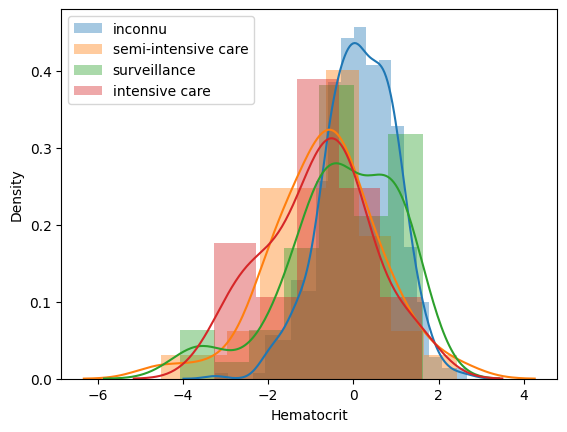

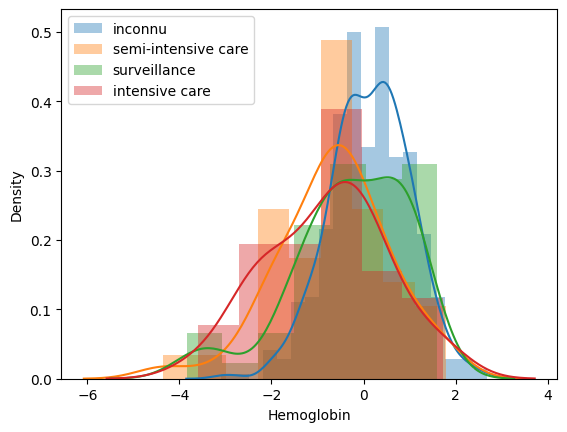

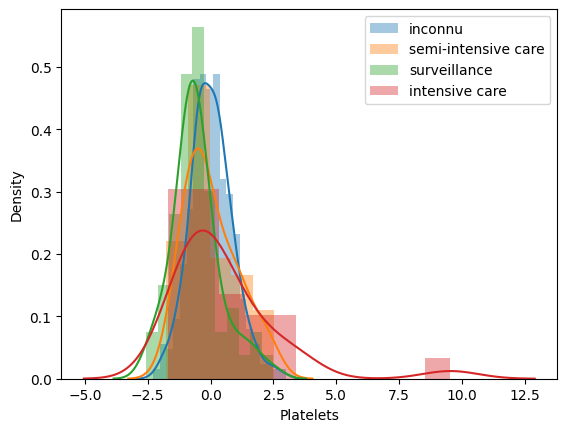

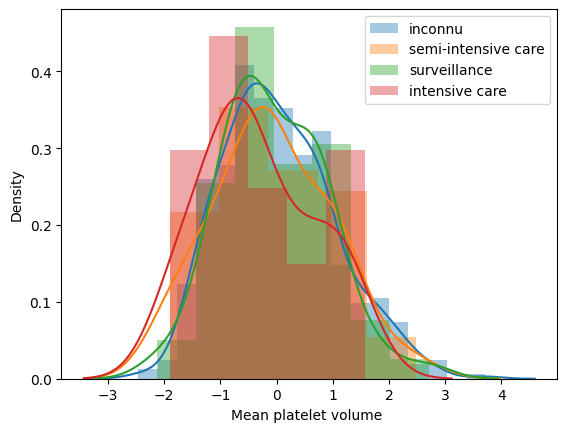

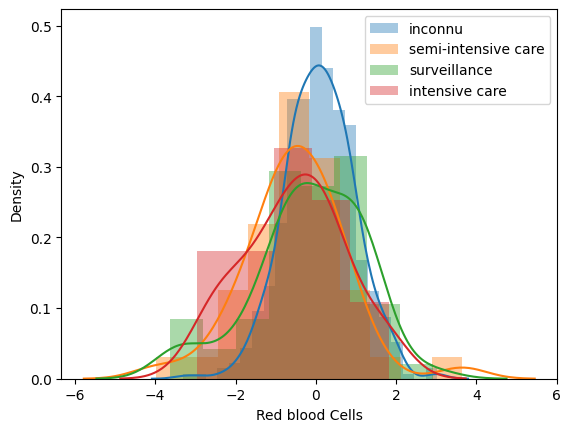

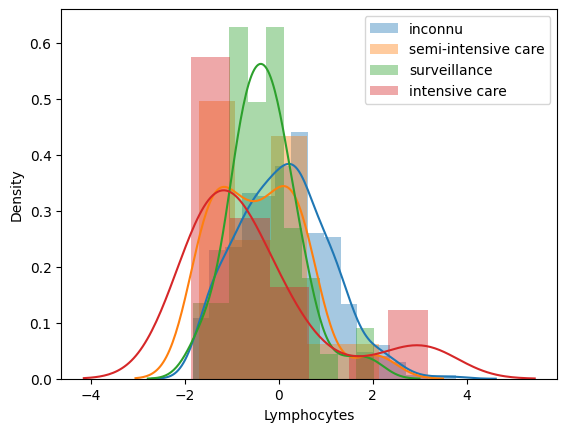

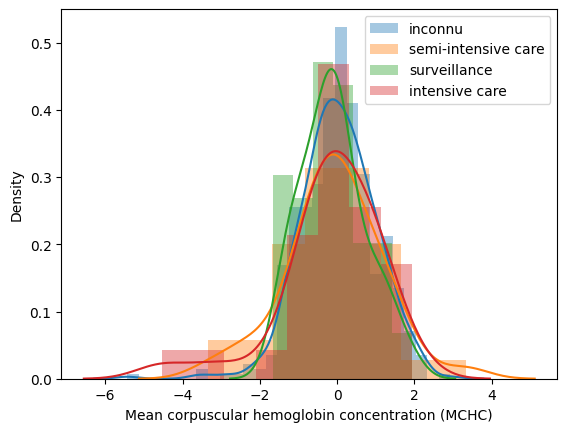

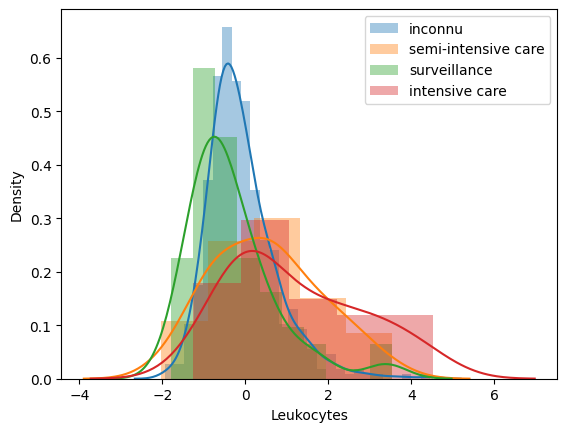

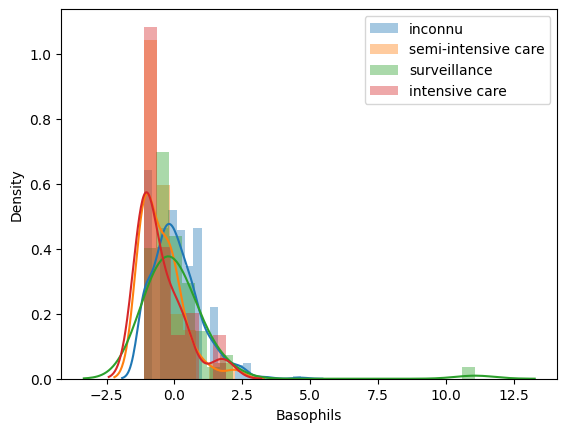

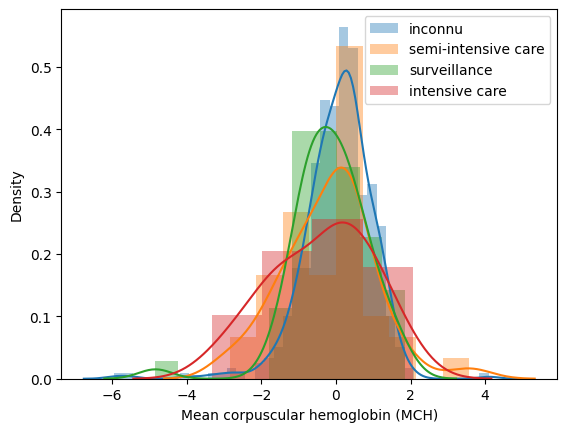

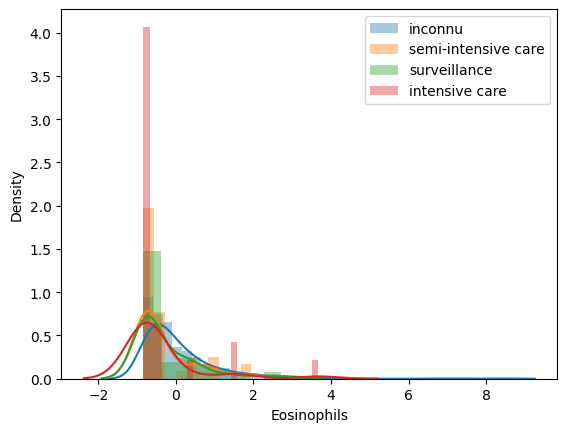

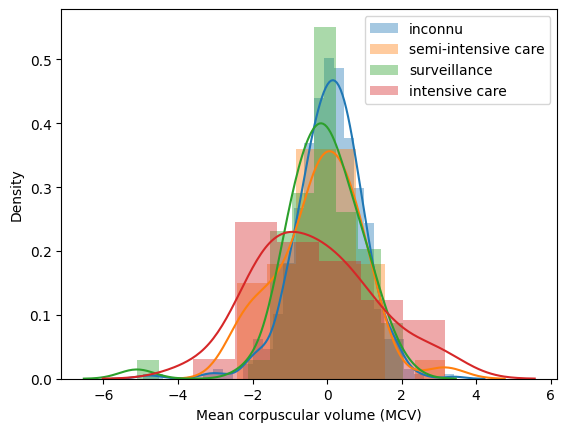

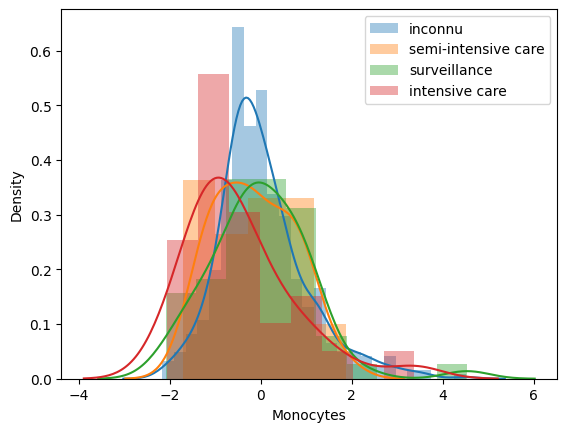

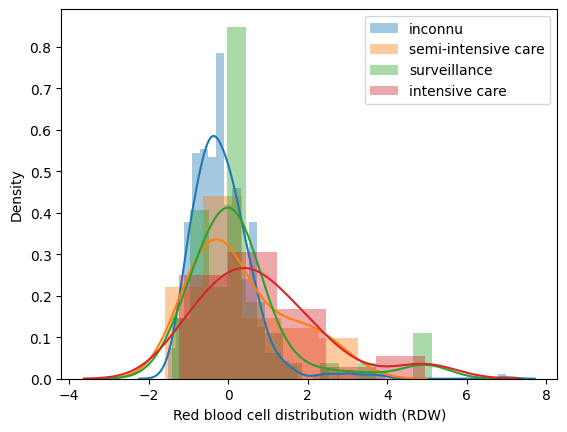

In [40]:
for col in blood_columns:
  plt.figure()
  for cat in df['status'].unique():
    sns.distplot(df[df['status']==cat][col], label=cat)
  plt.legend();

In [42]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [43]:
df2 = df[blood_columns[:-2]]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

covid
negative    0.864775
positive    0.135225
Name: proportion, dtype: float64

**Hypothesis test - Student test :**

In [44]:
from scipy.stats import ttest_ind

In [45]:
positive_df.shape

(558, 38)

In [46]:
negative_df.shape

(5086, 38)

In [48]:
balanced_ned = negative_df.sample(positive_df.shape[0])

In [49]:
def t_test(col):
  alpha = 0.02
  stat, p = ttest_ind(balanced_ned[col].dropna(), positive_df[col].dropna())
  if p < alpha:
    return 'H0 rejected'
  else:
    return 0

In [51]:
for col in blood_columns:
  print(f'{col:-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejected
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejected
Basophils----------------------------------------- H0 rejected
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejected
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- 0
Red blood cell distribution width (RDW)----------- 0
